In [1]:
import pandas as pd

# Cargar datasets
df_videos = pd.read_excel("Base_Videos_Final.xlsx")
df_jugadores = pd.read_excel("Datos_Jugadores_Padel.xlsx")

# Crear columnas limpias
df_videos["player_name_clean"] = (
    df_videos["player_name"]
    .astype(str)
    .str.strip()
    .str.upper()
)

df_jugadores["NOMBRE_clean"] = (
    df_jugadores["NOMBRE"]
    .astype(str)
    .str.strip()
    .str.upper()
)

# Merge usando los nombres limpios
df_merge = df_videos.merge(
    df_jugadores[["NOMBRE_clean", "ESTADO_FISICO"]],
    left_on="player_name_clean",
    right_on="NOMBRE_clean",
    how="left"
)

# Crear tabla única
tabla_estado = (
    df_merge[["player_name", "ESTADO_FISICO"]]
    .drop_duplicates()
    .sort_values("player_name")
    .reset_index(drop=True)
)

tabla_estado


,player_name,ESTADO_FISICO
0,Andrea Julieth Sosa Rodriguez,Bueno
1,Carlos Felipe Andrade SÃ¡enz,NaN
2,Cristian Stevan Soto Zapata,Bueno
3,CÃ©sar Camilo DÃ­az CufiÃ±o,NaN
4,David Santiago Medina Buitrago,Bueno
...,...,...
327,Valentina Jimenez Gomez,Bueno
328,juan miguel venegas garzÃ³n,NaN
329,maria jose martinez villabona,NaN
330,sara juliana solano boada,Bueno


In [2]:
df_merge.head()
df_merge.shape

(540300, 33)

In [3]:
df_videos = df_merge.copy()

In [4]:
jugadores_nan = (
    df_videos[df_videos["ESTADO_FISICO"].isna()][["player_name"]]
    .drop_duplicates()
    .sort_values("player_name")
)

jugadores_nan

,player_name
59801,Carlos Felipe Andrade SÃ¡enz
258740,CÃ©sar Camilo DÃ­az CufiÃ±o
527960,Fermin Alejandro Escalona Guillen
234271,Jaime Andres Castillo Alvarez
43205,Jorge Enrique Lugo Lopez
...,...
209610,Santiago Urrego RodrÃ­guez
113015,Sergio AndrÃ©s LÃ³pez RodrÃ­guez
460028,juan miguel venegas garzÃ³n
532091,maria jose martinez villabona


In [5]:
import unicodedata
import pandas as pd
import re

def reparar_y_limpiar(nombre):
    if pd.isna(nombre):
        return ""
    
    # Convertir a string
    nombre = str(nombre)

    # 1. REPARAR caracteres mal codificados (caso Andrés → AndrÃ©s)
    try:
        nombre = nombre.encode('latin1').decode('utf-8')
    except:
        pass  # Si no aplica, sigue igual

    # 2. Eliminar tildes (María → MARIA)
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode('utf-8')

    # 3. Quitar caracteres raros y dobles espacios
    nombre = re.sub(r'\s+', ' ', nombre).strip()

    # 4. Pasar a mayúsculas
    nombre = nombre.upper()

    return nombre


In [6]:
df_videos["player_name_clean"] = df_videos["player_name"].apply(reparar_y_limpiar)
df_jugadores["NOMBRE_clean"] = df_jugadores["NOMBRE"].apply(reparar_y_limpiar)


In [7]:
df_merge = df_videos.merge(
    df_jugadores[["NOMBRE_clean", "ESTADO_FISICO", "FRECUENCIA_DEPORTE"]],
    left_on="player_name_clean",
    right_on="NOMBRE_clean",
    how="left"
)


In [8]:
# Eliminar columnas duplicadas del primer merge
df_merge = df_merge.drop(columns=[
    "NOMBRE_clean_x",
    "ESTADO_FISICO_x",
    "NOMBRE_clean_y"    # OJO: la vamos a reemplazar con la versión limpia de jugadores
], errors="ignore")

# Renombrar correctamente la columna que queremos
df_merge = df_merge.rename(columns={
    "ESTADO_FISICO_y": "ESTADO_FISICO"
})


In [9]:
tabla_verificacion = (
    df_merge[[
        "player_name",
        "player_name_clean",
        "ESTADO_FISICO",
        "FRECUENCIA_DEPORTE"
    ]]
    .drop_duplicates()
    .sort_values("player_name_clean")
    .head(40)
)

tabla_verificacion


,player_name,player_name_clean,ESTADO_FISICO,FRECUENCIA_DEPORTE
361951,NaN,,NaN,NaN
23839,Andrea Julieth Sosa Rodriguez,ANDREA JULIETH SOSA RODRIGUEZ,Bueno,3-4 veces
59801,Carlos Felipe Andrade SÃ¡enz,CARLOS FELIPE ANDRADE SAENZ,NaN,NaN
263329,CÃ©sar Camilo DÃ­az CufiÃ±o,CESAR CAMILO DIAZ CUFINO,Bueno,Más de 4 veces
254167,Cristian Stevan Soto Zapata,CRISTIAN STEVAN SOTO ZAPATA,Bueno,3-4 veces
344210,David Santiago Medina Buitrago,DAVID SANTIAGO MEDINA BUITRAGO,Bueno,Más de 4 veces
224245,David Santiago Murcia Barrera,DAVID SANTIAGO MURCIA BARRERA,Regular,3-4 veces
535003,Fermin Alejandro Escalona Guillen,FERMIN ALEJANDRO ESCALONA GUILLEN,Excelente,Más de 4 veces
63395,Isabella Buitrago Hurtado,ISABELLA BUITRAGO HURTADO,Regular,1-2 veces
238860,Jaime Andres Castillo Alvarez,JAIME ANDRES CASTILLO ALVAREZ,NaN,NaN


In [10]:
# Eliminar filas donde el nombre sea del tipo Player_XX
df_merge = df_merge[~df_merge["player_name_clean"].str.match(r"PLAYER_\d+$")]


In [11]:
tabla_verificacion = (
    df_merge[[
        "player_name",
        "player_name_clean",
        "ESTADO_FISICO",
        "FRECUENCIA_DEPORTE"
    ]]
    .drop_duplicates()
    .sort_values("player_name_clean")
    .head(40)
)

tabla_verificacion



,player_name,player_name_clean,ESTADO_FISICO,FRECUENCIA_DEPORTE
361951,NaN,,NaN,NaN
23839,Andrea Julieth Sosa Rodriguez,ANDREA JULIETH SOSA RODRIGUEZ,Bueno,3-4 veces
59801,Carlos Felipe Andrade SÃ¡enz,CARLOS FELIPE ANDRADE SAENZ,NaN,NaN
263329,CÃ©sar Camilo DÃ­az CufiÃ±o,CESAR CAMILO DIAZ CUFINO,Bueno,Más de 4 veces
254167,Cristian Stevan Soto Zapata,CRISTIAN STEVAN SOTO ZAPATA,Bueno,3-4 veces
344210,David Santiago Medina Buitrago,DAVID SANTIAGO MEDINA BUITRAGO,Bueno,Más de 4 veces
224245,David Santiago Murcia Barrera,DAVID SANTIAGO MURCIA BARRERA,Regular,3-4 veces
535003,Fermin Alejandro Escalona Guillen,FERMIN ALEJANDRO ESCALONA GUILLEN,Excelente,Más de 4 veces
63395,Isabella Buitrago Hurtado,ISABELLA BUITRAGO HURTADO,Regular,1-2 veces
238860,Jaime Andres Castillo Alvarez,JAIME ANDRES CASTILLO ALVAREZ,NaN,NaN


In [12]:
# 1. Filtrar jugadores faltantes (con NaN)
faltantes = df_merge[
    df_merge["ESTADO_FISICO"].isna() | df_merge["FRECUENCIA_DEPORTE"].isna()
][["player_name", "player_name_clean"]].drop_duplicates()

faltantes


,player_name,player_name_clean
0,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO
625,Nicole Lizarazo,NICOLE LIZARAZO
1240,Nikol sofia avendaÃ±o,NIKOL SOFIA AVENDANO
43205,Jorge Enrique Lugo Lopez,JORGE ENRIQUE LUGO LOPEZ
43641,MarÃ­a JosÃ© Cifuentes,MARIA JOSE CIFUENTES
59801,Carlos Felipe Andrade SÃ¡enz,CARLOS FELIPE ANDRADE SAENZ
238860,Jaime Andres Castillo Alvarez,JAIME ANDRES CASTILLO ALVAREZ
239266,Nicolas Navarro,NICOLAS NAVARRO
326722,Santiago GutiÃ©rrez de PiÃ±eres Barbosa,SANTIAGO GUTIERREZ DE PINERES BARBOSA
361951,NaN,


In [13]:
# 2. Catálogo limpio de referencia
cat_ref = df_jugadores[["NOMBRE_clean", "ESTADO_FISICO", "FRECUENCIA_DEPORTE"]].drop_duplicates()

# --- FUNCIÓN: generar claves de 2 o 3 palabras ---
def clave_2words(name):
    if pd.isna(name) or name.strip() == "":
        return None
    parts = name.strip().split()
    if len(parts) < 2:
        return None
    combos = []
    for i in range(len(parts)-1):
        combos.append(parts[i] + " " + parts[i+1])
        if i < len(parts)-2:
            combos.append(parts[i] + " " + parts[i+1] + " " + parts[i+2])
    return combos


In [14]:
# 3. Expandir faltantes → múltiples claves posibles
expanded = []
for idx, row in faltantes.iterrows():
    claves = clave_2words(row["player_name_clean"])
    if claves:
        for c in claves:
            expanded.append([row["player_name"], row["player_name_clean"], c])

expanded_df = pd.DataFrame(expanded, columns=["player_name", "player_name_clean", "match_key"])

expanded_df.head(20)


,player_name,player_name_clean,match_key
0,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO,LUIS JORGE
1,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO,LUIS JORGE GARCIA
2,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO,JORGE GARCIA
3,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO,JORGE GARCIA CAMARGO
4,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO,GARCIA CAMARGO
5,Nicole Lizarazo,NICOLE LIZARAZO,NICOLE LIZARAZO
6,Nikol sofia avendaÃ±o,NIKOL SOFIA AVENDANO,NIKOL SOFIA
7,Nikol sofia avendaÃ±o,NIKOL SOFIA AVENDANO,NIKOL SOFIA AVENDANO
8,Nikol sofia avendaÃ±o,NIKOL SOFIA AVENDANO,SOFIA AVENDANO
9,Jorge Enrique Lugo Lopez,JORGE ENRIQUE LUGO LOPEZ,JORGE ENRIQUE


In [15]:
# 4. Buscar coincidencias por match_key
def buscar_match(clave):
    return cat_ref[cat_ref["NOMBRE_clean"].str.contains(clave, case=False, regex=False)]

matches = []
for idx, row in expanded_df.iterrows():
    cat = buscar_match(row["match_key"])
    if len(cat) > 0:
        for _, r in cat.iterrows():
            matches.append([
                row["player_name"],
                row["player_name_clean"],
                row["match_key"],
                r["NOMBRE_clean"],
                r["ESTADO_FISICO"],
                r["FRECUENCIA_DEPORTE"]
            ])

match_results = pd.DataFrame(matches, columns=[
    "player_name",
    "player_name_clean",
    "match_key",
    "matched_name",
    "ESTADO_FISICO",
    "FRECUENCIA_DEPORTE"
]).drop_duplicates()

match_results


,player_name,player_name_clean,match_key,matched_name,ESTADO_FISICO,FRECUENCIA_DEPORTE
0,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO,JORGE GARCIA,JORGE GARCIA CAMARGO,Regular,Más de 4 veces
1,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO,JORGE GARCIA CAMARGO,JORGE GARCIA CAMARGO,Regular,Más de 4 veces
2,Luis Jorge Garcia Camargo,LUIS JORGE GARCIA CAMARGO,GARCIA CAMARGO,JORGE GARCIA CAMARGO,Regular,Más de 4 veces
3,Nicole Lizarazo,NICOLE LIZARAZO,NICOLE LIZARAZO,NICOLE LIZARAZO HERNANDEZ,Regular,0 veces
4,Nikol sofia avendaÃ±o,NIKOL SOFIA AVENDANO,NIKOL SOFIA,NIKOL SOFIA AVENDANO SUAREZ,Regular,0 veces
5,Nikol sofia avendaÃ±o,NIKOL SOFIA AVENDANO,NIKOL SOFIA AVENDANO,NIKOL SOFIA AVENDANO SUAREZ,Regular,0 veces
6,Nikol sofia avendaÃ±o,NIKOL SOFIA AVENDANO,SOFIA AVENDANO,NIKOL SOFIA AVENDANO SUAREZ,Regular,0 veces
7,MarÃ­a JosÃ© Cifuentes,MARIA JOSE CIFUENTES,MARIA JOSE,MARIA JOSE MARTINEZ VILLABONA,Bueno,Más de 4 veces
8,MarÃ­a JosÃ© Cifuentes,MARIA JOSE CIFUENTES,MARIA JOSE,MARIA JOSE CIFUENTES MARTINEZ,Regular,3-4 veces
9,MarÃ­a JosÃ© Cifuentes,MARIA JOSE CIFUENTES,MARIA JOSE,MARIA JOSE SANDOVAL RICAURTE,Regular,1-2 veces


In [16]:
# 5. Unir matches al df principal
df_merge_fixed = df_merge.merge(
    match_results[["player_name_clean", "ESTADO_FISICO", "FRECUENCIA_DEPORTE"]],
    on="player_name_clean",
    how="left",
    suffixes=("", "_fix")
)

# Reemplazar NaN
for col in ["ESTADO_FISICO", "FRECUENCIA_DEPORTE"]:
    df_merge_fixed[col] = df_merge_fixed[col].fillna(df_merge_fixed[f"{col}_fix"])

df_merge_fixed = df_merge_fixed.drop(columns=["ESTADO_FISICO_fix", "FRECUENCIA_DEPORTE_fix"])


In [17]:
tabla_estado_final = (
    df_merge_fixed[[  # ← usa el df corregido
        "player_name",
        "player_name_clean",
        "ESTADO_FISICO",
        "FRECUENCIA_DEPORTE"
    ]]
    .drop_duplicates()
    .sort_values("player_name_clean")
    .reset_index(drop=True)
)

tabla_estado_final


,player_name,player_name_clean,ESTADO_FISICO,FRECUENCIA_DEPORTE
0,NaN,,NaN,NaN
1,Andrea Julieth Sosa Rodriguez,ANDREA JULIETH SOSA RODRIGUEZ,Bueno,3-4 veces
2,Carlos Felipe Andrade SÃ¡enz,CARLOS FELIPE ANDRADE SAENZ,NaN,NaN
3,CÃ©sar Camilo DÃ­az CufiÃ±o,CESAR CAMILO DIAZ CUFINO,Bueno,Más de 4 veces
4,Cristian Stevan Soto Zapata,CRISTIAN STEVAN SOTO ZAPATA,Bueno,3-4 veces
5,David Santiago Medina Buitrago,DAVID SANTIAGO MEDINA BUITRAGO,Bueno,Más de 4 veces
6,David Santiago Murcia Barrera,DAVID SANTIAGO MURCIA BARRERA,Regular,3-4 veces
7,Fermin Alejandro Escalona Guillen,FERMIN ALEJANDRO ESCALONA GUILLEN,Excelente,Más de 4 veces
8,Isabella Buitrago Hurtado,ISABELLA BUITRAGO HURTADO,Regular,1-2 veces
9,Jaime Andres Castillo Alvarez,JAIME ANDRES CASTILLO ALVAREZ,NaN,NaN


In [18]:
tabla_estado_final = (
    df_merge_fixed
    .sort_values("player_name_clean")
    .drop_duplicates(subset=["player_name_clean"])   # 👈 conservar 1 jugador único
    [["player_name", "player_name_clean", "ESTADO_FISICO", "FRECUENCIA_DEPORTE"]]
    .reset_index(drop=True)
)

tabla_estado_final


,player_name,player_name_clean,ESTADO_FISICO,FRECUENCIA_DEPORTE
0,NaN,,NaN,NaN
1,Andrea Julieth Sosa Rodriguez,ANDREA JULIETH SOSA RODRIGUEZ,Bueno,3-4 veces
2,Carlos Felipe Andrade SÃ¡enz,CARLOS FELIPE ANDRADE SAENZ,NaN,NaN
3,CÃ©sar Camilo DÃ­az CufiÃ±o,CESAR CAMILO DIAZ CUFINO,Bueno,Más de 4 veces
4,Cristian Stevan Soto Zapata,CRISTIAN STEVAN SOTO ZAPATA,Bueno,3-4 veces
5,David Santiago Medina Buitrago,DAVID SANTIAGO MEDINA BUITRAGO,Bueno,Más de 4 veces
6,David Santiago Murcia Barrera,DAVID SANTIAGO MURCIA BARRERA,Regular,3-4 veces
7,Fermin Alejandro Escalona Guillen,FERMIN ALEJANDRO ESCALONA GUILLEN,Excelente,Más de 4 veces
8,Isabella Buitrago Hurtado,ISABELLA BUITRAGO HURTADO,Regular,1-2 veces
9,Jaime Andres Castillo Alvarez,JAIME ANDRES CASTILLO ALVAREZ,NaN,NaN


In [19]:
df_merge = df_merge[df_merge["player_name_clean"].str.upper() != "NAN"]


In [20]:
df_merge_fixed = df_merge.merge(
    match_results[["player_name_clean", "ESTADO_FISICO", "FRECUENCIA_DEPORTE"]],
    on="player_name_clean",
    how="left",
    suffixes=("", "_fix")
)

for col in ["ESTADO_FISICO", "FRECUENCIA_DEPORTE"]:
    df_merge_fixed[col] = df_merge_fixed[col].fillna(df_merge_fixed[f"{col}_fix"])

df_merge_fixed = df_merge_fixed.drop(columns=["ESTADO_FISICO_fix", "FRECUENCIA_DEPORTE_fix"])


In [21]:
df_merge_fixed.head()

,frame_idx,duration,total_frames,video_duration,player_id,player_name,team,zone,ball_position_x,ball_position_y,...,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,time_since_last_hit,partido,punto,player_name_clean,ESTADO_FISICO,FRECUENCIA_DEPORTE
0,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0,LUIS JORGE GARCIA CAMARGO,Regular,Más de 4 veces
1,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0,LUIS JORGE GARCIA CAMARGO,Regular,Más de 4 veces
2,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0,LUIS JORGE GARCIA CAMARGO,Regular,Más de 4 veces
3,1,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0,LUIS JORGE GARCIA CAMARGO,Regular,Más de 4 veces
4,1,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0,LUIS JORGE GARCIA CAMARGO,Regular,Más de 4 veces


In [22]:
df_merge_fixed.shape

(475657, 33)

In [23]:
pd.set_option('display.max_columns', None)
df_merge_fixed.columns


Index(['frame_idx', 'duration', 'total_frames', 'video_duration', 'player_id',
       'player_name', 'team', 'zone', 'ball_position_x', 'ball_position_y',
       'player_position_x', 'player_position_y', 'distance_ball_to_net',
       'distance_player_to_ball_m', 'distance_player_to_net_m',
       'distance_player_to_teammate_m', 'player_hits_ball', 'prev_x', 'prev_y',
       'player_displacement', 'player_speed_mps', 'prev_speed',
       'player_acceleration_mps2', 'ball_position_x_prev',
       'ball_position_y_prev', 'ball_displacement', 'ball_speed_mps',
       'time_since_last_hit', 'partido', 'punto', 'player_name_clean',
       'ESTADO_FISICO', 'FRECUENCIA_DEPORTE'],
      dtype='object')

In [24]:
# Columnas que se eliminan del dataframe final para el modelo
cols_to_drop = [
    "frame_idx",
    "player_id",
    "team",
    "NOMBRE_clean",
    "prev_x", "prev_y",
    "ball_position_x_prev", "ball_position_y_prev",
    "ball_position_x", "ball_position_y",
    "player_position_x", "player_position_y"
]

df_clean = df_merge_fixed.drop(columns=cols_to_drop, errors='ignore')

df_clean.shape, df_clean.columns


((475657, 22),
 Index(['duration', 'total_frames', 'video_duration', 'player_name', 'zone',
        'distance_ball_to_net', 'distance_player_to_ball_m',
        'distance_player_to_net_m', 'distance_player_to_teammate_m',
        'player_hits_ball', 'player_displacement', 'player_speed_mps',
        'prev_speed', 'player_acceleration_mps2', 'ball_displacement',
        'ball_speed_mps', 'time_since_last_hit', 'partido', 'punto',
        'player_name_clean', 'ESTADO_FISICO', 'FRECUENCIA_DEPORTE'],
       dtype='object'))

In [25]:
# 1. Seleccionar métricas numéricas relevantes para promediar por jugador/partido
metricas = [
    "player_displacement",
    "player_speed_mps",
    "player_acceleration_mps2",
    "distance_player_to_ball_m",
    "distance_player_to_net_m",
    "distance_player_to_teammate_m",
    "ball_speed_mps",
    "ball_displacement",
    "distance_ball_to_net",
    "time_since_last_hit",
    "duration",
    "total_frames",
    "video_duration",
    "punto"
]

# 2. Además, sumar hits (actividad)
metricas_sum = ["player_hits_ball"]

# 3. Agrupar por jugador y partido
df_partido = (
    df_merge_fixed
    .groupby(["player_name_clean", "partido"])
    .agg(
        {**{m: "mean" for m in metricas},
         **{s: "sum" for s in metricas_sum}}
    )
    .reset_index()
)

df_partido.head(10)


,player_name_clean,partido,player_displacement,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,distance_ball_to_net,time_since_last_hit,duration,total_frames,video_duration,punto,player_hits_ball
0,,Partido 30,0.010372,0.611770,1.145369e-01,6.757665,5.953550,3.981122,0.0,0.0,2.982342,2.75578,0.016995,546.630676,9.270507,NaN,73
1,ANDREA JULIETH SOSA RODRIGUEZ,17,0.033899,1.016960,-3.487102e-02,5.880587,2.901887,3.363489,NaN,NaN,4.258258,NaN,0.033333,257.373302,8.579110,6.205503,12
2,ANDREA JULIETH SOSA RODRIGUEZ,23,0.045882,1.376459,9.617319e-15,11.885809,8.348017,4.525297,NaN,NaN,4.212583,NaN,0.033333,263.007951,8.766932,5.748233,16
3,ANDREA JULIETH SOSA RODRIGUEZ,Partido 29,0.057524,1.725723,1.724651e-01,7.794564,3.345932,6.328215,NaN,NaN,4.141819,NaN,0.033333,474.796496,15.826550,6.288634,0
4,CARLOS FELIPE ANDRADE SAENZ,1,0.020783,0.623498,-3.308102e-02,8.597797,8.320383,13.004944,NaN,NaN,5.485870,NaN,0.033333,395.885383,13.196179,3.688345,19
5,CARLOS FELIPE ANDRADE SAENZ,19,0.216007,6.480207,2.693878e-14,10.652102,8.413785,NaN,NaN,NaN,4.118299,NaN,0.033333,394.209728,13.140324,5.876500,5
6,CARLOS FELIPE ANDRADE SAENZ,21,0.096977,2.909316,4.868826e-02,4.798010,4.308591,3.492186,NaN,NaN,4.766058,NaN,0.033333,345.190054,11.506335,5.199873,14
7,CESAR CAMILO DIAZ CUFINO,9,0.049191,2.951447,-3.439451e-01,5.999708,5.311053,NaN,NaN,NaN,4.609393,NaN,0.016667,678.032278,11.300538,6.413951,57
8,CESAR CAMILO DIAZ CUFINO,14,0.005872,0.352294,5.270361e-02,7.058445,3.626435,6.727556,NaN,NaN,4.592398,NaN,0.016667,497.265585,8.287760,4.620299,52
9,CRISTIAN STEVAN SOTO ZAPATA,32,0.037207,1.116200,-2.325797e-02,6.445585,3.642937,5.563382,NaN,NaN,3.653932,NaN,0.033333,278.821800,9.294060,7.480326,3


In [26]:
df_merge_fixed[[
    "player_name_clean",
    "partido",
    "punto",
    "player_displacement",
    "player_speed_mps",
    "player_acceleration_mps2",
    "distance_player_to_ball_m",
    "distance_player_to_net_m",
    "distance_player_to_teammate_m",
    "ball_speed_mps"
]].head(20)


,player_name_clean,partido,punto,player_displacement,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps
0,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,NaN,NaN,NaN,13.58119,6.355556,7.41199,NaN
1,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,NaN,NaN,NaN,13.58119,6.355556,7.41199,NaN
2,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,NaN,NaN,NaN,13.58119,6.355556,7.41199,NaN
3,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,0.0,0.0,NaN,13.58119,6.355556,7.41199,NaN
4,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,0.0,0.0,NaN,13.58119,6.355556,7.41199,NaN
5,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,0.0,0.0,NaN,13.58119,6.355556,7.41199,NaN
6,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,0.0,0.0,0.0,13.58119,6.355556,7.41199,NaN
7,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,0.0,0.0,0.0,13.58119,6.355556,7.41199,NaN
8,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,0.0,0.0,0.0,13.58119,6.355556,7.41199,NaN
9,LUIS JORGE GARCIA CAMARGO,Partido 27,10.0,0.0,0.0,0.0,13.58119,6.355556,7.38810,NaN


In [27]:
df_point_avg = df_merge_fixed.groupby(
    ["player_name_clean", "partido", "punto"],
    as_index=False
).agg({
    "player_displacement": "mean",
    "player_speed_mps": "mean",
    "player_acceleration_mps2": "mean",
    "distance_player_to_ball_m": "mean",
    "distance_player_to_net_m": "mean",
    "distance_player_to_teammate_m": "mean",
    "ball_speed_mps": "mean",
    "ball_displacement": "mean",
    "player_hits_ball": "sum",       # esto sí se suma, no se promedia
    "time_since_last_hit": "mean",
    "duration": "sum",               # CAMBIO: suma en lugar de promedio
    "total_frames": "sum",           # suma de frames del punto
    "video_duration": "first",       # se repite por partido, así que cualquiera sirve
    "ESTADO_FISICO": "first",        # tu target, se mantiene igual
    "FRECUENCIA_DEPORTE": "first"
})


pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)

df_point_avg.head(300)


,player_name_clean,partido,punto,player_displacement,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,player_hits_ball,time_since_last_hit,duration,total_frames,video_duration,ESTADO_FISICO,FRECUENCIA_DEPORTE
0,ANDREA JULIETH SOSA RODRIGUEZ,17,1.0,0.002546,0.076368,-3.999034e-15,4.567719,2.355334,1.427512,NaN,NaN,0,NaN,6.700000,40401,6.700000,Bueno,3-4 veces
1,ANDREA JULIETH SOSA RODRIGUEZ,17,2.0,0.032024,0.960706,4.640279e-15,8.373752,2.775225,1.950169,NaN,NaN,2,NaN,9.866667,87616,9.866667,Bueno,3-4 veces
2,ANDREA JULIETH SOSA RODRIGUEZ,17,3.0,0.041141,1.234223,-4.806613e-15,5.166349,3.075893,2.154784,NaN,NaN,0,NaN,11.400000,116964,11.400000,Bueno,3-4 veces
3,ANDREA JULIETH SOSA RODRIGUEZ,17,4.0,0.075289,2.258672,5.002016e-15,6.707245,3.749423,3.741636,NaN,NaN,2,NaN,9.300000,78120,9.333333,Bueno,3-4 veces
4,ANDREA JULIETH SOSA RODRIGUEZ,17,5.0,0.011274,0.338225,1.037143e-14,5.262476,2.955478,3.357214,NaN,NaN,0,NaN,9.566667,82369,9.566667,Bueno,3-4 veces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,JUAN MIGUEL VENEGAS GARZON,42,1.0,0.004385,0.263109,0.000000e+00,7.214943,4.165128,4.992531,0.0,0.0,0,NaN,2.166667,16900,2.166667,Regular,0 veces
296,JUAN MIGUEL VENEGAS GARZON,42,2.0,0.002325,0.139484,0.000000e+00,7.808056,4.112774,4.635275,0.0,0.0,0,NaN,2.450000,21609,2.450000,Regular,0 veces
297,JUAN MIGUEL VENEGAS GARZON,42,3.0,0.004679,0.280716,0.000000e+00,8.827712,4.045439,4.604803,0.0,0.0,0,NaN,2.233333,17956,2.233333,Regular,0 veces
298,JUAN MIGUEL VENEGAS GARZON,42,4.0,0.011802,0.708124,0.000000e+00,6.207234,4.861270,4.282455,0.0,0.0,0,NaN,2.333333,19600,2.333333,Regular,0 veces


In [28]:
(df_point_avg.isna().mean() * 100).sort_values(ascending=False)


time_since_last_hit              96.751969
ball_speed_mps                   31.102362
ball_displacement                31.102362
distance_player_to_teammate_m    17.716535
FRECUENCIA_DEPORTE               13.779528
ESTADO_FISICO                    13.779528
partido                           0.000000
player_name_clean                 0.000000
punto                             0.000000
player_displacement               0.000000
distance_player_to_ball_m         0.000000
distance_player_to_net_m          0.000000
player_speed_mps                  0.000000
player_acceleration_mps2          0.000000
duration                          0.000000
player_hits_ball                  0.000000
video_duration                    0.000000
total_frames                      0.000000
dtype: float64

In [29]:
# 2. Imputación contextual para métricas del balón
df_point_avg["ball_speed_mps"] = df_point_avg["ball_speed_mps"].fillna(0)
df_point_avg["ball_displacement"] = df_point_avg["ball_displacement"].fillna(0)

# 3. Imputar por jugador la distancia al compañero
df_point_avg["distance_player_to_teammate_m"] = (
    df_point_avg.groupby("player_name_clean")["distance_player_to_teammate_m"]
                .transform(lambda x: x.fillna(x.mean()))
)

# 4. Imputación simple para etiquetas (para evitar NaN)
df_point_avg["ESTADO_FISICO"] = df_point_avg["ESTADO_FISICO"].fillna("Desconocido")
df_point_avg["FRECUENCIA_DEPORTE"] = df_point_avg["FRECUENCIA_DEPORTE"].fillna("Desconocido")


In [30]:
df_point_avg.head(10)

,player_name_clean,partido,punto,player_displacement,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,player_hits_ball,time_since_last_hit,duration,total_frames,video_duration,ESTADO_FISICO,FRECUENCIA_DEPORTE
0,ANDREA JULIETH SOSA RODRIGUEZ,17,1.0,0.002546,0.076368,-3.999034e-15,4.567719,2.355334,1.427512,0.0,0.0,0,NaN,6.700000,40401,6.700000,Bueno,3-4 veces
1,ANDREA JULIETH SOSA RODRIGUEZ,17,2.0,0.032024,0.960706,4.640279e-15,8.373752,2.775225,1.950169,0.0,0.0,2,NaN,9.866667,87616,9.866667,Bueno,3-4 veces
2,ANDREA JULIETH SOSA RODRIGUEZ,17,3.0,0.041141,1.234223,-4.806613e-15,5.166349,3.075893,2.154784,0.0,0.0,0,NaN,11.400000,116964,11.400000,Bueno,3-4 veces
3,ANDREA JULIETH SOSA RODRIGUEZ,17,4.0,0.075289,2.258672,5.002016e-15,6.707245,3.749423,3.741636,0.0,0.0,2,NaN,9.300000,78120,9.333333,Bueno,3-4 veces
4,ANDREA JULIETH SOSA RODRIGUEZ,17,5.0,0.011274,0.338225,1.037143e-14,5.262476,2.955478,3.357214,0.0,0.0,0,NaN,9.566667,82369,9.566667,Bueno,3-4 veces
5,ANDREA JULIETH SOSA RODRIGUEZ,17,6.0,0.021680,0.650414,2.483756e-15,6.089037,2.157895,2.854910,0.0,0.0,1,NaN,7.600000,51984,7.600000,Bueno,3-4 veces
6,ANDREA JULIETH SOSA RODRIGUEZ,17,7.0,0.076014,2.280419,0.000000e+00,4.356932,2.900938,3.841942,0.0,0.0,0,NaN,7.500000,50625,7.500000,Bueno,3-4 veces
7,ANDREA JULIETH SOSA RODRIGUEZ,17,8.0,0.012728,0.381838,1.340647e-15,5.892606,3.519393,3.941441,0.0,0.0,0,NaN,5.366667,25921,5.366667,Bueno,3-4 veces
8,ANDREA JULIETH SOSA RODRIGUEZ,17,9.0,0.053976,1.619275,-1.471626e-14,2.466462,3.418165,4.933752,0.0,0.0,2,NaN,8.033333,58081,8.033333,Bueno,3-4 veces
9,ANDREA JULIETH SOSA RODRIGUEZ,17,10.0,0.016423,0.492694,-3.662711e-01,5.617459,2.609365,3.633490,0.0,0.0,4,NaN,9.333333,78400,9.333333,Bueno,3-4 veces


In [31]:
df_point_avg.dtypes


player_name_clean                 object
partido                           object
punto                            float64
player_displacement              float64
player_speed_mps                 float64
player_acceleration_mps2         float64
distance_player_to_ball_m        float64
distance_player_to_net_m         float64
distance_player_to_teammate_m    float64
ball_speed_mps                   float64
ball_displacement                float64
player_hits_ball                   int64
time_since_last_hit              float64
duration                         float64
total_frames                       int64
video_duration                   float64
ESTADO_FISICO                     object
FRECUENCIA_DEPORTE                object
dtype: object

In [32]:
partidos_por_jugador = (
    df_point_avg
        .groupby("player_name_clean")["partido"]
        .nunique()            # cuenta partidos únicos
        .sort_values()        # ordena de menor a mayor (opcional)
)

partidos_por_jugador


player_name_clean
FERMIN ALEJANDRO ESCALONA GUILLEN        1
MARIA FERNANDA TAMAYO LOPEZ              1
MARIA JOSE MARTINEZ VILLABONA            1
CESAR CAMILO DIAZ CUFINO                 2
SANTIAGO URREGO RODRIGUEZ                2
NIKOL SOFIA AVENDANO                     2
JUAN MIGUEL VENEGAS GARZON               2
JAIME ANDRES CASTILLO ALVAREZ            2
SANTIAGO PENA BELTRAN                    2
TOMAS BARRIOS GUEVARA                    2
JORGE ENRIQUE LUGO LOPEZ                 3
ISABELLA BUITRAGO HURTADO                3
CRISTIAN STEVAN SOTO ZAPATA              3
DAVID SANTIAGO MEDINA BUITRAGO           3
CARLOS FELIPE ANDRADE SAENZ              3
DAVID SANTIAGO MURCIA BARRERA            3
SANTIAGO GUTIERREZ DE PINERES BARBOSA    3
SAMUEL ANDRES RODRIGUEZ ULLOA            3
JUAN PABLO BENITEZ BERNAL                3
JUAN PABLO VARGAS JIMENEZ                3
JUAN PABLO APONTE VELOZA                 3
LUIS MARIO RAMIREZ MUNOZ                 3
NICOLAS NAVARRO                     

In [33]:
jugadores_muestra = df_point_avg["player_name_clean"].drop_duplicates().head(3)

resumen_muestra = (
    df_point_avg[df_point_avg["player_name_clean"].isin(jugadores_muestra)]
        .sort_values(["player_name_clean", "partido", "punto"])
        .groupby("player_name_clean")
        .head(1)
)

resumen_muestra


,player_name_clean,partido,punto,player_displacement,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,player_hits_ball,time_since_last_hit,duration,total_frames,video_duration,ESTADO_FISICO,FRECUENCIA_DEPORTE
0,ANDREA JULIETH SOSA RODRIGUEZ,17,1.0,0.002546,0.076368,-3.999034e-15,4.567719,2.355334,1.427512,0.0,0.0,0,NaN,6.700000,40401,6.700000,Bueno,3-4 veces
33,CARLOS FELIPE ANDRADE SAENZ,1,1.0,0.012774,0.383206,2.296704e-15,7.869224,7.854058,12.963738,0.0,0.0,5,NaN,16.566667,330008,22.133333,Desconocido,Desconocido
59,CESAR CAMILO DIAZ CUFINO,9,1.0,0.048263,2.895808,-5.656854e-01,6.286368,4.188828,6.748824,0.0,0.0,0,NaN,6.033333,131044,6.033333,Bueno,Más de 4 veces


In [34]:
df_point_avg.shape

(1016, 18)

In [35]:
# ===========================================================
# CORRECCIÓN DE player_displacement SIN COORDENADAS ORIGINALES
# Conversión: normalizado → pixeles → metros
# ===========================================================

MC_HEIGHT_PX = 450         # Minicourt height
PIXEL_TO_METER = 0.03      # 1 px ≈ 0.03 m

df_point_avg["player_displacement_px"] = df_point_avg["player_displacement"] * MC_HEIGHT_PX

df_point_avg["player_displacement_m"] = (
    df_point_avg["player_displacement_px"] * PIXEL_TO_METER
)


In [36]:
df_point_avg[["player_displacement", 
              "player_displacement_px", 
              "player_displacement_m"]].head(10)


,player_displacement,player_displacement_px,player_displacement_m
0,0.002546,1.145513,0.034365
1,0.032024,14.410597,0.432318
2,0.041141,18.513341,0.555400
3,0.075289,33.880080,1.016402
4,0.011274,5.073368,0.152201
5,0.021680,9.756205,0.292686
6,0.076014,34.206291,1.026189
7,0.012728,5.727565,0.171827
8,0.053976,24.289118,0.728674
9,0.016423,7.390406,0.221712


In [37]:
df_distance_point = df_point_avg.groupby(
    ["player_name_clean", "partido", "punto"],
    as_index=False
)["player_displacement_m"].sum().reset_index(drop=True)

# Calcular duración total por partido (suma de duraciones de todos los puntos)
df_partido_duracion = df_point_avg.groupby("partido", as_index=False).agg({
    "duration": "sum"  # suma de todas las duraciones (frames/fps)
}).rename(columns={"duration": "duracion_partido_total"})

# Fusionar con df_distance_point
df_distance_point = df_distance_point.merge(
    df_partido_duracion,
    on="partido",
    how="left"
)


In [38]:
df_distance_point.head(10)

,player_name_clean,partido,punto,player_displacement_m,duracion_partido_total
0,ANDREA JULIETH SOSA RODRIGUEZ,17,1.0,0.034365,196.3
1,ANDREA JULIETH SOSA RODRIGUEZ,17,2.0,0.432318,196.3
2,ANDREA JULIETH SOSA RODRIGUEZ,17,3.0,0.555400,196.3
3,ANDREA JULIETH SOSA RODRIGUEZ,17,4.0,1.016402,196.3
4,ANDREA JULIETH SOSA RODRIGUEZ,17,5.0,0.152201,196.3
5,ANDREA JULIETH SOSA RODRIGUEZ,17,6.0,0.292686,196.3
6,ANDREA JULIETH SOSA RODRIGUEZ,17,7.0,1.026189,196.3
7,ANDREA JULIETH SOSA RODRIGUEZ,17,8.0,0.171827,196.3
8,ANDREA JULIETH SOSA RODRIGUEZ,17,9.0,0.728674,196.3
9,ANDREA JULIETH SOSA RODRIGUEZ,17,10.0,0.221712,196.3


In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Análisis descriptivo del desplazamiento
print("=" * 60)
print("ANÁLISIS DESCRIPTIVO: player_displacement_m")
print("=" * 60)
print(df_distance_point["player_displacement_m"].describe())
print("\n")
print(f"Mínimo: {df_distance_point['player_displacement_m'].min():.2f} m")
print(f"Máximo: {df_distance_point['player_displacement_m'].max():.2f} m")
print(f"Mediana: {df_distance_point['player_displacement_m'].median():.2f} m")
print(f"Desv. Est.: {df_distance_point['player_displacement_m'].std():.2f} m")
print(f"Total de puntos: {len(df_distance_point)}")


ANÁLISIS DESCRIPTIVO: player_displacement_m
count    1016.000000
mean        0.634580
std         0.952344
min         0.000000
25%         0.149599
50%         0.310371
75%         0.756503
max        10.045967
Name: player_displacement_m, dtype: float64


Mínimo: 0.00 m
Máximo: 10.05 m
Mediana: 0.31 m
Desv. Est.: 0.95 m
Total de puntos: 1016


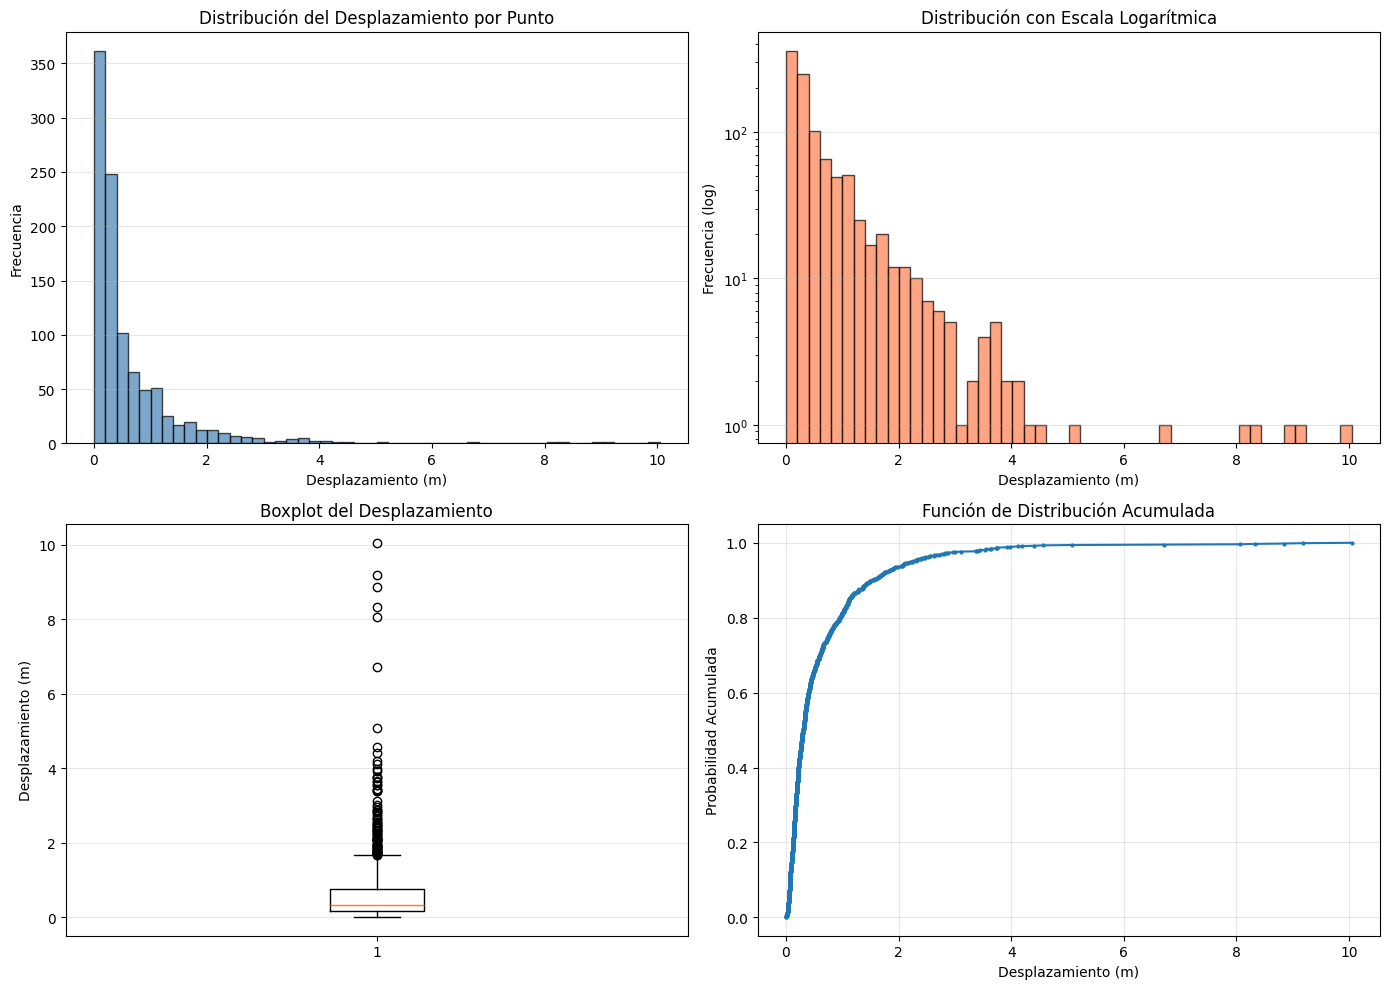


✓ Visualizaciones generadas


In [40]:
# Histograma de distribución del desplazamiento
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma simple
axes[0, 0].hist(df_distance_point["player_displacement_m"], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Desplazamiento (m)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución del Desplazamiento por Punto')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Histograma con escala logarítmica (para ver outliers)
axes[0, 1].hist(df_distance_point["player_displacement_m"], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Desplazamiento (m)')
axes[0, 1].set_ylabel('Frecuencia (log)')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Distribución con Escala Logarítmica')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Boxplot
axes[1, 0].boxplot(df_distance_point["player_displacement_m"], vert=True)
axes[1, 0].set_ylabel('Desplazamiento (m)')
axes[1, 0].set_title('Boxplot del Desplazamiento')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Gráfico acumulativo
sorted_data = np.sort(df_distance_point["player_displacement_m"])
cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, cumulative, marker='o', linestyle='-', markersize=2)
axes[1, 1].set_xlabel('Desplazamiento (m)')
axes[1, 1].set_ylabel('Probabilidad Acumulada')
axes[1, 1].set_title('Función de Distribución Acumulada')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones generadas")


In [41]:
# Análisis de sentido: validar si los valores son razonables
print("\n" + "=" * 60)
print("VALIDACIÓN: ¿Tiene sentido el cálculo?")
print("=" * 60)

# En una cancha de pádel:
# - Largo: ~20m, Ancho: ~10m
# - Diagonal: ~22.4m

desplazamiento_max = df_distance_point["player_displacement_m"].max()
desplazamiento_medio = df_distance_point["player_displacement_m"].mean()
desplazamiento_p95 = df_distance_point["player_displacement_m"].quantile(0.95)

print(f"\n📏 REFERENCIA DE CANCHA:")
print(f"   Largo cancha: ~20 m")
print(f"   Ancho cancha: ~10 m")
print(f"   Diagonal: ~22.4 m")

print(f"\n📊 TUS DATOS:")
print(f"   Desplazamiento máximo: {desplazamiento_max:.2f} m")
print(f"   Desplazamiento medio: {desplazamiento_medio:.2f} m")
print(f"   Desplazamiento P95: {desplazamiento_p95:.2f} m")

print(f"\n✅ VALIDACIÓN:")
if desplazamiento_max < 30:
    print(f"   ✓ El máximo ({desplazamiento_max:.2f}m) es razonable (cerca del diagonal de cancha)")
else:
    print(f"   ⚠ El máximo ({desplazamiento_max:.2f}m) parece muy alto")

if 1 < desplazamiento_medio < 5:
    print(f"   ✓ El promedio ({desplazamiento_medio:.2f}m) es coherente")
else:
    print(f"   ⚠ El promedio ({desplazamiento_medio:.2f}m) parece bajo o muy alto")

# Porcentajes
print(f"\n📈 DISTRIBUCIÓN:")
print(f"   {(df_distance_point['player_displacement_m'] < 5).sum() / len(df_distance_point) * 100:.1f}% de puntos: < 5m")
print(f"   {((df_distance_point['player_displacement_m'] >= 5) & (df_distance_point['player_displacement_m'] < 10)).sum() / len(df_distance_point) * 100:.1f}% de puntos: 5-10m")
print(f"   {(df_distance_point['player_displacement_m'] >= 10).sum() / len(df_distance_point) * 100:.1f}% de puntos: >= 10m")



VALIDACIÓN: ¿Tiene sentido el cálculo?

📏 REFERENCIA DE CANCHA:
   Largo cancha: ~20 m
   Ancho cancha: ~10 m
   Diagonal: ~22.4 m

📊 TUS DATOS:
   Desplazamiento máximo: 10.05 m
   Desplazamiento medio: 0.63 m
   Desplazamiento P95: 2.24 m

✅ VALIDACIÓN:
   ✓ El máximo (10.05m) es razonable (cerca del diagonal de cancha)
   ⚠ El promedio (0.63m) parece bajo o muy alto

📈 DISTRIBUCIÓN:
   99.3% de puntos: < 5m
   0.6% de puntos: 5-10m
   0.1% de puntos: >= 10m


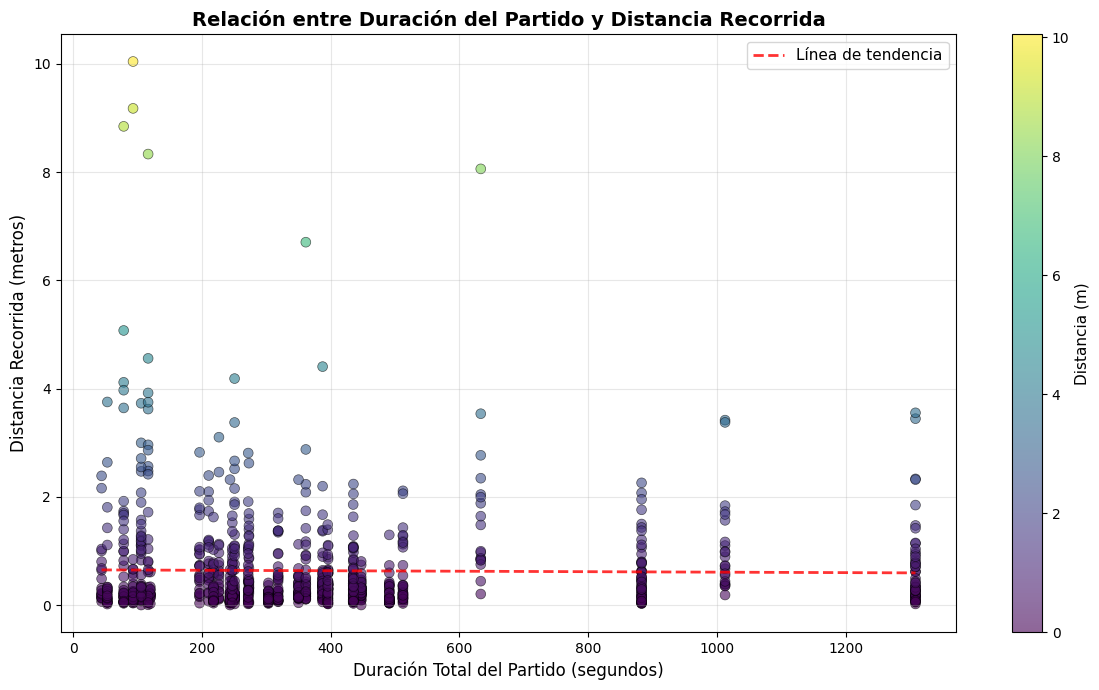


📊 CORRELACIÓN:
   Correlación (Pearson): -0.0134
   → Correlación débil


In [42]:
# Scatter plot: Distancia vs Duración del Partido
fig, ax = plt.subplots(figsize=(12, 7))

# Scatter plot
scatter = ax.scatter(
    df_distance_point["duracion_partido_total"], 
    df_distance_point["player_displacement_m"],
    alpha=0.6,
    s=50,
    c=df_distance_point["player_displacement_m"],
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('Duración Total del Partido (segundos)', fontsize=12)
ax.set_ylabel('Distancia Recorrida (metros)', fontsize=12)
ax.set_title('Relación entre Duración del Partido y Distancia Recorrida', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Distancia (m)', fontsize=11)

# Agregar línea de tendencia
z = np.polyfit(df_distance_point["duracion_partido_total"].dropna(), 
               df_distance_point["player_displacement_m"].dropna(), 1)
p = np.poly1d(z)
x_trend = np.linspace(df_distance_point["duracion_partido_total"].min(), 
                      df_distance_point["duracion_partido_total"].max(), 100)
ax.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label='Línea de tendencia')

ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Estadísticas de correlación
correlation = df_distance_point["duracion_partido_total"].corr(df_distance_point["player_displacement_m"])
print(f"\n📊 CORRELACIÓN:")
print(f"   Correlación (Pearson): {correlation:.4f}")
print(f"   → {'Correlación positiva fuerte' if correlation > 0.7 else 'Correlación moderada' if correlation > 0.3 else 'Correlación débil'}")


In [43]:
df_point_avg = df_point_avg.drop(columns=["time_since_last_hit", "player_displacement"])

df_point_avg.head()

,player_name_clean,partido,punto,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,player_hits_ball,duration,total_frames,video_duration,ESTADO_FISICO,FRECUENCIA_DEPORTE,player_displacement_px,player_displacement_m
0,ANDREA JULIETH SOSA RODRIGUEZ,17,1.0,0.076368,-3.999034e-15,4.567719,2.355334,1.427512,0.0,0.0,0,6.700000,40401,6.700000,Bueno,3-4 veces,1.145513,0.034365
1,ANDREA JULIETH SOSA RODRIGUEZ,17,2.0,0.960706,4.640279e-15,8.373752,2.775225,1.950169,0.0,0.0,2,9.866667,87616,9.866667,Bueno,3-4 veces,14.410597,0.432318
2,ANDREA JULIETH SOSA RODRIGUEZ,17,3.0,1.234223,-4.806613e-15,5.166349,3.075893,2.154784,0.0,0.0,0,11.400000,116964,11.400000,Bueno,3-4 veces,18.513341,0.555400
3,ANDREA JULIETH SOSA RODRIGUEZ,17,4.0,2.258672,5.002016e-15,6.707245,3.749423,3.741636,0.0,0.0,2,9.300000,78120,9.333333,Bueno,3-4 veces,33.880080,1.016402
4,ANDREA JULIETH SOSA RODRIGUEZ,17,5.0,0.338225,1.037143e-14,5.262476,2.955478,3.357214,0.0,0.0,0,9.566667,82369,9.566667,Bueno,3-4 veces,5.073368,0.152201


In [44]:
# Left join con df_jugadores para agregar variables adicionales
# Primero, crear un dataframe único por jugador de df_jugadores usando NOMBRE_clean
df_jugadores_unique = df_jugadores[["NOMBRE_clean", "EDAD", "PRACTICA_OTRO_DEPORTE_RAQUETA", "NIVEL_ACTUAL_PADEL", "ESTATURA"]].drop_duplicates()

# Hacer el left join usando player_name_clean como clave
df_point_avg = df_point_avg.merge(
    df_jugadores_unique,
    left_on="player_name_clean",
    right_on="NOMBRE_clean",
    how="left"
)

# Eliminar la columna NOMBRE_clean duplicada del merge
df_point_avg = df_point_avg.drop(columns=["NOMBRE_clean"], errors="ignore")

# Eliminar columnas con sufijo _x (duplicadas del merge)
cols_to_drop = [col for col in df_point_avg.columns if col.endswith('_x')]
df_point_avg = df_point_avg.drop(columns=cols_to_drop, errors="ignore")

# Eliminar columnas con sufijo _y y renombrar las sin sufijo
cols_to_drop_y = [col for col in df_point_avg.columns if col.endswith('_y')]
df_point_avg = df_point_avg.drop(columns=cols_to_drop_y, errors="ignore")

print("Columnas finales de df_point_avg:")
print(df_point_avg.columns.tolist())
print("\nPrimeras filas:")
df_point_avg.head()

Columnas finales de df_point_avg:
['player_name_clean', 'partido', 'punto', 'player_speed_mps', 'player_acceleration_mps2', 'distance_player_to_ball_m', 'distance_player_to_net_m', 'distance_player_to_teammate_m', 'ball_speed_mps', 'ball_displacement', 'player_hits_ball', 'duration', 'total_frames', 'video_duration', 'ESTADO_FISICO', 'FRECUENCIA_DEPORTE', 'player_displacement_px', 'player_displacement_m', 'EDAD', 'PRACTICA_OTRO_DEPORTE_RAQUETA', 'NIVEL_ACTUAL_PADEL', 'ESTATURA']

Primeras filas:


,player_name_clean,partido,punto,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,player_hits_ball,duration,total_frames,video_duration,ESTADO_FISICO,FRECUENCIA_DEPORTE,player_displacement_px,player_displacement_m,EDAD,PRACTICA_OTRO_DEPORTE_RAQUETA,NIVEL_ACTUAL_PADEL,ESTATURA
0,ANDREA JULIETH SOSA RODRIGUEZ,17,1.0,0.076368,-3.999034e-15,4.567719,2.355334,1.427512,0.0,0.0,0,6.700000,40401,6.700000,Bueno,3-4 veces,1.145513,0.034365,20.0,Tenis,Primera vez,162.0
1,ANDREA JULIETH SOSA RODRIGUEZ,17,2.0,0.960706,4.640279e-15,8.373752,2.775225,1.950169,0.0,0.0,2,9.866667,87616,9.866667,Bueno,3-4 veces,14.410597,0.432318,20.0,Tenis,Primera vez,162.0
2,ANDREA JULIETH SOSA RODRIGUEZ,17,3.0,1.234223,-4.806613e-15,5.166349,3.075893,2.154784,0.0,0.0,0,11.400000,116964,11.400000,Bueno,3-4 veces,18.513341,0.555400,20.0,Tenis,Primera vez,162.0
3,ANDREA JULIETH SOSA RODRIGUEZ,17,4.0,2.258672,5.002016e-15,6.707245,3.749423,3.741636,0.0,0.0,2,9.300000,78120,9.333333,Bueno,3-4 veces,33.880080,1.016402,20.0,Tenis,Primera vez,162.0
4,ANDREA JULIETH SOSA RODRIGUEZ,17,5.0,0.338225,1.037143e-14,5.262476,2.955478,3.357214,0.0,0.0,0,9.566667,82369,9.566667,Bueno,3-4 veces,5.073368,0.152201,20.0,Tenis,Primera vez,162.0


In [45]:
df_point_avg.shape

(1016, 22)

In [46]:
# --- Imputación EDAD y ESTATURA con su promedio ---

# EDAD → promedio y convertir a entero
df_point_avg['EDAD'] = df_point_avg['EDAD'].fillna(round(df_point_avg['EDAD'].mean())).astype(int)

# ESTATURA → promedio (en cm) y convertir a entero
df_point_avg['ESTATURA'] = df_point_avg['ESTATURA'].fillna(round(df_point_avg['ESTATURA'].mean())).astype(int)


# --- Imputación categórica con "Desconocido" ---

df_point_avg['PRACTICA_OTRO_DEPORTE_RAQUETA'] = df_point_avg['PRACTICA_OTRO_DEPORTE_RAQUETA'].fillna('Desconocido')

df_point_avg['NIVEL_ACTUAL_PADEL'] = df_point_avg['NIVEL_ACTUAL_PADEL'].fillna('Desconocido')


In [47]:
df_point_avg['EDAD'].describe()
df_point_avg['ESTATURA'].describe()


count    1016.000000
mean      171.724409
std         5.932696
min       160.000000
25%       170.000000
50%       172.000000
75%       173.500000
max       186.000000
Name: ESTATURA, dtype: float64

In [48]:
df_point_avg.shape

(1016, 22)

In [49]:
df_point_avg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   player_name_clean              1016 non-null   object 
 1   partido                        1016 non-null   object 
 2   punto                          1016 non-null   float64
 3   player_speed_mps               1016 non-null   float64
 4   player_acceleration_mps2       1016 non-null   float64
 5   distance_player_to_ball_m      1016 non-null   float64
 6   distance_player_to_net_m       1016 non-null   float64
 7   distance_player_to_teammate_m  1016 non-null   float64
 8   ball_speed_mps                 1016 non-null   float64
 9   ball_displacement              1016 non-null   float64
 10  player_hits_ball               1016 non-null   int64  
 11  duration                       1016 non-null   float64
 12  total_frames                   1016 non-null   i

In [50]:
# 1. Velocidades imposibles (> 7.5 m/s)
df_point_avg[df_point_avg['player_speed_mps'] > 7.5]

# 2. Aceleraciones imposibles (> 5 m/s2)
df_point_avg[df_point_avg['player_acceleration_mps2'] > 5]

# 3. Velocidad de la pelota imposible (> 40 m/s)
df_point_avg[df_point_avg['ball_speed_mps'] > 40]

# 4. Distancias imposibles (> 12 metros)
cols_dist = ['distance_player_to_ball_m', 'distance_player_to_net_m', 'distance_player_to_teammate_m']
for col in cols_dist:
    print(col)
    display(df_point_avg[df_point_avg[col] > 12])


distance_player_to_ball_m


,player_name_clean,partido,punto,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,player_hits_ball,duration,total_frames,video_duration,ESTADO_FISICO,FRECUENCIA_DEPORTE,player_displacement_px,player_displacement_m,EDAD,PRACTICA_OTRO_DEPORTE_RAQUETA,NIVEL_ACTUAL_PADEL,ESTATURA
12,ANDREA JULIETH SOSA RODRIGUEZ,23,1.0,0.267956,0.000000e+00,12.662411,11.395344,4.747095,0.0,0.0,0,7.000000,44100,7.000000,Bueno,3-4 veces,4.019344,0.120580,20,Tenis,Primera vez,162
16,ANDREA JULIETH SOSA RODRIGUEZ,23,6.0,0.544032,-7.651999e-15,15.875875,8.880847,4.274005,0.0,0.0,2,7.000000,44100,7.000000,Bueno,3-4 veces,8.160486,0.244815,20,Tenis,Primera vez,162
17,ANDREA JULIETH SOSA RODRIGUEZ,23,7.0,0.725849,-3.085557e-01,15.917073,9.268663,4.747095,0.0,0.0,0,5.566667,27889,5.566667,Bueno,3-4 veces,10.887741,0.326632,20,Tenis,Primera vez,162
18,ANDREA JULIETH SOSA RODRIGUEZ,23,8.0,1.039140,1.851334e-01,14.334904,9.814200,4.747095,0.0,0.0,0,9.233333,76729,9.233333,Bueno,3-4 veces,15.587093,0.467613,20,Tenis,Primera vez,162
19,ANDREA JULIETH SOSA RODRIGUEZ,23,9.0,2.145915,4.547474e-14,12.520549,8.217088,3.827299,0.0,0.0,6,9.233333,76729,9.233333,Bueno,3-4 veces,32.188730,0.965662,20,Tenis,Primera vez,162
22,ANDREA JULIETH SOSA RODRIGUEZ,Partido 29,2.0,1.407612,9.156778e-02,12.992121,4.986300,6.572212,0.0,0.0,0,18.600000,343728,20.533333,Bueno,3-4 veces,21.114183,0.633425,20,Tenis,Primera vez,162
36,CARLOS FELIPE ANDRADE SAENZ,1,4.0,1.351810,-1.462980e-01,12.597146,8.197841,12.566301,0.0,0.0,0,11.666667,136150,12.966667,Desconocido,Desconocido,20.277148,0.608314,20,Desconocido,Desconocido,172
44,CARLOS FELIPE ANDRADE SAENZ,19,6.0,2.157769,1.989520e-14,16.115007,9.159970,8.057738,0.0,0.0,0,9.733333,85264,9.733333,Desconocido,Desconocido,32.366537,0.970996,20,Desconocido,Desconocido,172
45,CARLOS FELIPE ANDRADE SAENZ,19,7.0,1.857334,-2.397586e-14,12.306308,9.135421,8.057738,0.0,0.0,0,6.033333,32761,6.033333,Desconocido,Desconocido,27.860007,0.835800,20,Desconocido,Desconocido,172
135,DAVID SANTIAGO MURCIA BARRERA,31,1.0,0.650190,-3.280005e-14,12.102540,6.249825,3.383209,0.0,0.0,0,19.000000,326610,19.100000,Regular,3-4 veces,9.752854,0.292586,20,Tenis de mesa,Primera vez,173


distance_player_to_net_m


,player_name_clean,partido,punto,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,player_hits_ball,duration,total_frames,video_duration,ESTADO_FISICO,FRECUENCIA_DEPORTE,player_displacement_px,player_displacement_m,EDAD,PRACTICA_OTRO_DEPORTE_RAQUETA,NIVEL_ACTUAL_PADEL,ESTATURA
183,ISABELLA BUITRAGO HURTADO,31,8.0,0.072601,0.000000e+00,17.941502,12.533097,2.704385,0.0,0.0,0,6.266667,35344,6.266667,Regular,1-2 veces,1.089020,0.032671,18,Tenis,Primera vez,162
334,JUAN PABLO BENITEZ BERNAL,13,1.0,3.532036,3.225159e-14,14.446736,12.531612,4.859340,0.0,0.0,0,9.466667,80656,9.466667,Excelente,Más de 4 veces,52.980538,1.589416,21,Tenis,Primera vez,175


distance_player_to_teammate_m


,player_name_clean,partido,punto,player_speed_mps,player_acceleration_mps2,distance_player_to_ball_m,distance_player_to_net_m,distance_player_to_teammate_m,ball_speed_mps,ball_displacement,player_hits_ball,duration,total_frames,video_duration,ESTADO_FISICO,FRECUENCIA_DEPORTE,player_displacement_px,player_displacement_m,EDAD,PRACTICA_OTRO_DEPORTE_RAQUETA,NIVEL_ACTUAL_PADEL,ESTATURA
33,CARLOS FELIPE ANDRADE SAENZ,1,1.0,0.383206,2.296704e-15,7.869224,7.854058,12.963738,0.0,0.0,5,16.566667,330008,22.133333,Desconocido,Desconocido,5.748094,0.172443,20,Desconocido,Desconocido,172
34,CARLOS FELIPE ANDRADE SAENZ,1,2.0,0.614451,8.931875e-01,8.384461,8.842185,15.324313,0.0,0.0,0,1.966667,7316,4.133333,Desconocido,Desconocido,9.216771,0.276503,20,Desconocido,Desconocido,172
35,CARLOS FELIPE ANDRADE SAENZ,1,3.0,0.437386,-4.675592e-15,9.550173,8.891396,12.961930,0.0,0.0,5,6.500000,44655,7.633333,Desconocido,Desconocido,6.560785,0.196824,20,Desconocido,Desconocido,172
36,CARLOS FELIPE ANDRADE SAENZ,1,4.0,1.351810,-1.462980e-01,12.597146,8.197841,12.566301,0.0,0.0,0,11.666667,136150,12.966667,Desconocido,Desconocido,20.277148,0.608314,20,Desconocido,Desconocido,172
37,CARLOS FELIPE ANDRADE SAENZ,1,6.0,0.304600,3.667317e-15,9.166186,9.029016,13.400043,0.0,0.0,0,5.233333,30615,6.500000,Desconocido,Desconocido,4.568998,0.137070,20,Desconocido,Desconocido,172
38,CARLOS FELIPE ANDRADE SAENZ,1,7.0,0.441431,3.346161e-15,2.349374,8.193103,12.938479,0.0,0.0,3,5.800000,42108,8.066667,Desconocido,Desconocido,6.621462,0.198644,20,Desconocido,Desconocido,172
39,CARLOS FELIPE ANDRADE SAENZ,1,8.0,0.480833,-4.278293e-01,6.839041,8.679155,12.964319,0.0,0.0,6,4.033333,23958,6.600000,Desconocido,Desconocido,7.212489,0.216375,20,Desconocido,Desconocido,172
159,FERMIN ALEJANDRO ESCALONA GUILLEN,6,5.0,0.607901,1.531179e+00,3.518446,6.006914,12.526237,0.0,0.0,2,2.250000,18225,2.250000,Excelente,Más de 4 veces,4.559256,0.136778,19,No,Primera vez,176
349,JUAN PABLO BENITEZ BERNAL,31,4.0,0.417153,0.000000e+00,0.830840,6.100494,12.865789,0.0,0.0,2,6.000000,32400,6.000000,Excelente,Más de 4 veces,6.257302,0.187719,21,Tenis,Primera vez,175
785,SANTIAGO NAVARRO CUY,1,2.0,0.055189,0.000000e+00,5.388320,5.192473,21.126339,0.0,0.0,0,4.133333,15376,4.133333,Malo,0 veces,0.827832,0.024835,19,No,Primera vez,180


In [51]:
cols_dist = [
    'distance_player_to_ball_m',
    'distance_player_to_net_m',
    'distance_player_to_teammate_m'
]

for col in cols_dist:
    # media solo con valores válidos (≤ 12 metros)
    valid_mean = df_point_avg.loc[df_point_avg[col] <= 12, col].mean()

    # imputamos valores imposibles (> 12) con la media válida
    df_point_avg.loc[df_point_avg[col] > 12, col] = valid_mean

    # también corregimos cualquier valor negativo por si acaso
    df_point_avg.loc[df_point_avg[col] < 0, col] = valid_mean


In [52]:
# velocidad del jugador
valid_speed_mean = df_point_avg.loc[df_point_avg['player_speed_mps'] <= 7.5, 'player_speed_mps'].mean()
df_point_avg.loc[df_point_avg['player_speed_mps'] > 7.5, 'player_speed_mps'] = valid_speed_mean

# aceleración
valid_acc_mean = df_point_avg.loc[df_point_avg['player_acceleration_mps2'] <= 5, 'player_acceleration_mps2'].mean()
df_point_avg.loc[df_point_avg['player_acceleration_mps2'] > 5, 'player_acceleration_mps2'] = valid_acc_mean

# velocidad de la bola
valid_ball_speed_mean = df_point_avg.loc[df_point_avg['ball_speed_mps'] <= 40, 'ball_speed_mps'].mean()
df_point_avg.loc[df_point_avg['ball_speed_mps'] > 40, 'ball_speed_mps'] = valid_ball_speed_mean


In [53]:
# Filtra solo aceleraciones realistas entre -5 y +5 m/s2
valid_acc = df_point_avg.loc[(df_point_avg['player_acceleration_mps2'] >= -5) &
                             (df_point_avg['player_acceleration_mps2'] <= 5),
                             'player_acceleration_mps2']

valid_acc_mean = valid_acc.mean()

# Reemplaza valores irreales fuera del rango
df_point_avg.loc[df_point_avg['player_acceleration_mps2'] < -5, 'player_acceleration_mps2'] = valid_acc_mean
df_point_avg.loc[df_point_avg['player_acceleration_mps2'] > 5,  'player_acceleration_mps2'] = valid_acc_mean


In [54]:
df_point_avg.drop(columns=['ball_speed_mps'], inplace=True)


In [55]:
df_point_avg['player_acceleration_mps2'].describe()


count    1.016000e+03
mean     2.348550e-02
std      5.749028e-01
min     -4.907151e+00
25%     -1.122318e-14
50%      0.000000e+00
75%      7.358525e-14
max      4.735971e+00
Name: player_acceleration_mps2, dtype: float64

<Axes: >

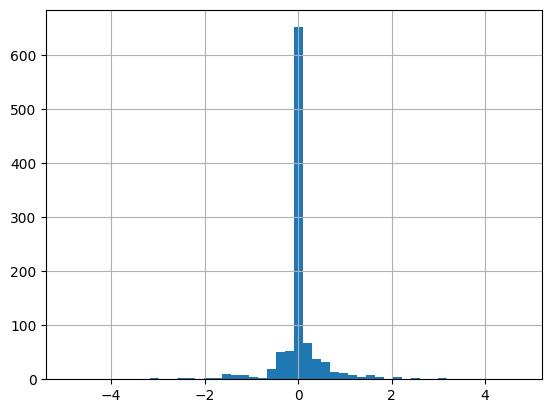

In [56]:
df_point_avg['player_acceleration_mps2'].hist(bins=50)


In [57]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier


In [58]:
# Asegúrate de que partido esté como string (opcional, solo por consistencia)
df_point_avg['partido'] = df_point_avg['partido'].astype(str)

agg_dict = {
    'player_speed_mps': ['mean', 'std', 'max'],
    'player_acceleration_mps2': ['mean', 'std', 'max', 'min'],
    'distance_player_to_ball_m': ['mean', 'std'],
    'distance_player_to_net_m': ['mean', 'std'],
    'distance_player_to_teammate_m': ['mean', 'std'],
    'ball_displacement': ['sum'],
    'player_hits_ball': ['sum'],
    'duration': ['sum', 'mean'],
    'total_frames': ['sum'],
    'video_duration': ['first'],
    'player_displacement_m': ['sum', 'mean'],
    'EDAD': ['first'],
    'ESTATURA': ['first'],
    'PRACTICA_OTRO_DEPORTE_RAQUETA': ['first'],
    'NIVEL_ACTUAL_PADEL': ['first'],
    'ESTADO_FISICO': ['first'],
    'FRECUENCIA_DEPORTE': ['first']
}

matches = df_point_avg.groupby(
    ['player_name_clean', 'partido']
).agg(agg_dict).reset_index()

# Aplanar columnas MultiIndex tipo (col, agg) → col_agg
matches.columns = [
    '_'.join([str(c) for c in col if c != '']).strip('_')
    for col in matches.columns
]

matches.head()


,player_name_clean,partido,player_speed_mps_mean,player_speed_mps_std,player_speed_mps_max,player_acceleration_mps2_mean,player_acceleration_mps2_std,player_acceleration_mps2_max,player_acceleration_mps2_min,distance_player_to_ball_m_mean,distance_player_to_ball_m_std,distance_player_to_net_m_mean,distance_player_to_net_m_std,distance_player_to_teammate_m_mean,distance_player_to_teammate_m_std,ball_displacement_sum,player_hits_ball_sum,duration_sum,duration_mean,total_frames_sum,video_duration_first,player_displacement_m_sum,player_displacement_m_mean,EDAD_first,ESTATURA_first,PRACTICA_OTRO_DEPORTE_RAQUETA_first,NIVEL_ACTUAL_PADEL_first,ESTADO_FISICO_first,FRECUENCIA_DEPORTE_first
0,ANDREA JULIETH SOSA RODRIGUEZ,17,0.994176,0.740275,2.280419,-0.030523,0.105733,1.037143e-14,-0.366271,5.860039,1.736788,2.901612,0.494912,3.241905,1.001009,0.0,12,98.133333,8.177778,757707,6.700000,5.368553,0.447379,20,162,Tenis,Primera vez,Bueno,3-4 veces
1,ANDREA JULIETH SOSA RODRIGUEZ,23,1.282758,0.734321,2.503158,-0.010876,0.153363,1.851334e-01,-0.308556,7.686406,2.221061,8.449625,1.658551,4.795484,0.702167,0.0,16,75.466667,8.385185,595450,7.000000,5.195168,0.577241,20,162,Tenis,Primera vez,Bueno,3-4 veces
2,ANDREA JULIETH SOSA RODRIGUEZ,Partido 29,1.776705,1.270778,4.605290,0.157706,0.369875,9.737208e-01,-0.294287,7.284096,1.967448,3.308851,1.085917,6.215994,0.849179,0.0,0,148.400000,12.366667,2113794,8.166667,9.594208,0.799517,20,162,Tenis,Primera vez,Bueno,3-4 veces
3,CARLOS FELIPE ANDRADE SAENZ,1,0.573388,0.356024,1.351810,0.045580,0.405726,8.931875e-01,-0.427829,7.200342,2.443118,8.526679,0.443467,5.296399,0.000000,0.0,19,51.766667,7.395238,614810,22.133333,1.806172,0.258025,20,172,Desconocido,Desconocido,Desconocido,Desconocido
4,CARLOS FELIPE ANDRADE SAENZ,19,2.737854,1.750381,6.150522,-0.018910,0.203126,3.886388e-01,-0.318198,9.140136,2.537018,8.124200,1.803689,8.057738,0.000000,0.0,5,105.533333,11.725926,1248068,13.933333,21.380848,2.375650,20,172,Desconocido,Desconocido,Desconocido,Desconocido


In [59]:
matches.shape

(104, 29)

In [60]:
# Copiar dataset de partidos
df_estado = matches[matches['ESTADO_FISICO_first'] != 'Desconocido'].copy()

# Definir target
target_estado = 'ESTADO_FISICO_first'

# Features: todo excepto estos
drop_cols = ['player_name_clean', 'partido', 'ESTADO_FISICO_first', 'FRECUENCIA_DEPORTE_first']

feature_cols = [c for c in matches.columns if c not in drop_cols]

# Separar numéricas y categóricas
num_features = [c for c in feature_cols if df_estado[c].dtype != 'object']
cat_features = [c for c in feature_cols if df_estado[c].dtype == 'object']

X = df_estado[feature_cols]
y = df_estado[target_estado]


In [61]:
le_estado = LabelEncoder()
y_encoded = le_estado.fit_transform(y)

print("Clases originales → codificación:")
for clase, code in zip(le_estado.classes_, range(len(le_estado.classes_))):
    print(clase, "→", code)


Clases originales → codificación:
Bueno → 0
Excelente → 1
Malo → 2
Regular → 3


In [62]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [63]:
# Preprocesamiento para numéricas
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocesamiento para categóricas
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

# Modelo XGBoost
xgb_estado = XGBClassifier(
    objective='multi:softprob',
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)

# Pipeline final
pipe_estado = Pipeline(steps=[
    ("preprocess", preprocessor),       
    ("model", xgb_estado)
])


In [64]:
pipe_estado.fit(X_train_e, y_train_e)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:
# Predicción (codificada)
y_pred_e = pipe_estado.predict(X_test_e)

# Convertir al nombre real (Malo, Regular, Bueno, Excelente)
y_pred_labels = le_estado.inverse_transform(y_pred_e)
y_test_labels = le_estado.inverse_transform(y_test_e)


In [66]:
print("=== ESTADO_FISICO ===")
print(classification_report(y_test_labels, y_pred_labels))
print(confusion_matrix(y_test_labels, y_pred_labels))


=== ESTADO_FISICO ===
              precision    recall  f1-score   support

       Bueno       0.64      1.00      0.78         9
   Excelente       0.00      0.00      0.00         2
        Malo       0.00      0.00      0.00         1
     Regular       1.00      0.67      0.80         6

    accuracy                           0.72        18
   macro avg       0.41      0.42      0.40        18
weighted avg       0.65      0.72      0.66        18

[[9 0 0 0]
 [2 0 0 0]
 [1 0 0 0]
 [2 0 0 4]]


c:\Users\tabut\OneDrive\Escritorio\Analitica e Datos\Proyecto_Final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tabut\OneDrive\Escritorio\Analitica e Datos\Proyecto_Final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tabut\OneDrive\Escritorio\Analitica e Datos\Proyecto_Final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

In [67]:
df_plot = matches.dropna(subset=['ESTADO_FISICO_first']).copy()

print("Partidos totales en matches:", matches.shape[0])
print("Partidos SIN estado físico (eliminados):", matches['ESTADO_FISICO_first'].isna().sum())
print("Partidos con estado físico (usados en PCA):", df_plot.shape[0])


Partidos totales en matches: 104
Partidos SIN estado físico (eliminados): 0
Partidos con estado físico (usados en PCA): 104


In [68]:
variables_fisicas = [
    c for c in df_plot.columns
    if c not in [
        'player_name_clean', 'partido',
        'ESTADO_FISICO_first', 'FRECUENCIA_DEPORTE_first'
    ] and df_plot[c].dtype != 'object'
]

X_unsup = df_plot[variables_fisicas].copy()


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)


In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por PC1 y PC2:", pca.explained_variance_ratio_)


Varianza explicada por PC1 y PC2: [0.23792421 0.15349308]


In [71]:
# Obtener nombres de variables
feature_names = variables_fisicas  # <-- las variables numéricas que usaste en PCA

# Loadings → matriz (n_variables × n_componentes)
loadings = pd.DataFrame(
    pca.components_.T,   # transpuesta para tener variables en filas
    columns=["PC1", "PC2"],
    index=feature_names
)

print(loadings)


                                             PC1       PC2
player_speed_mps_mean               3.384459e-01  0.200596
player_speed_mps_std                3.389760e-01  0.158990
player_speed_mps_max                3.370056e-01  0.189163
player_acceleration_mps2_mean      -1.144637e-01 -0.042960
player_acceleration_mps2_std        2.838983e-01 -0.132266
player_acceleration_mps2_max        1.641059e-01 -0.145533
player_acceleration_mps2_min       -2.907945e-01  0.071600
distance_player_to_ball_m_mean      7.529232e-02  0.181375
distance_player_to_ball_m_std       8.833557e-02  0.081609
distance_player_to_net_m_mean       5.237546e-02 -0.027425
distance_player_to_net_m_std        2.106667e-01  0.071927
distance_player_to_teammate_m_mean -1.017622e-01  0.206004
distance_player_to_teammate_m_std   5.314946e-02  0.039370
ball_displacement_sum               3.231174e-27  0.000000
player_hits_ball_sum               -1.390722e-01  0.172011
duration_sum                       -1.569670e-01  0.4693

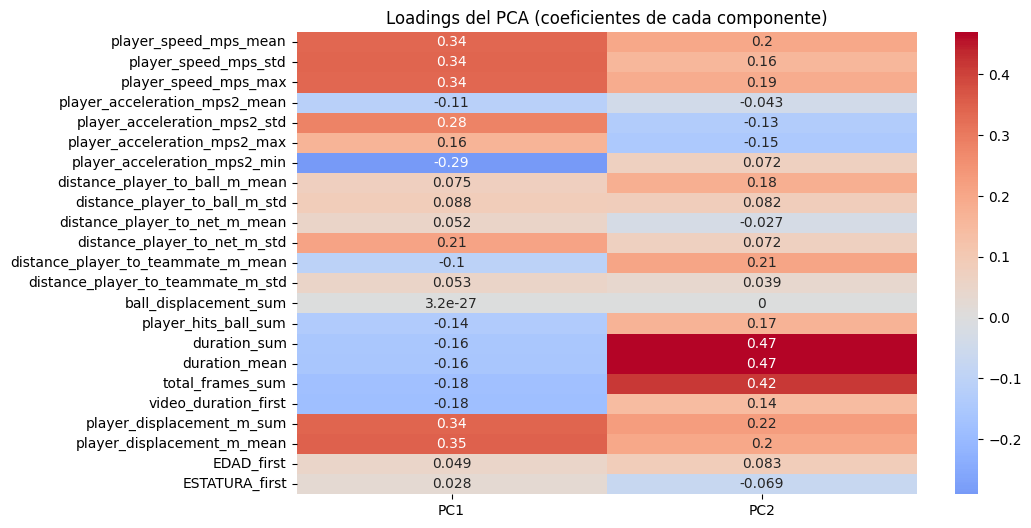

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Loadings del PCA (coeficientes de cada componente)")
plt.show()


In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_plot['cluster'] = clusters


In [74]:
colores = {
    'Malo': 'red',
    'Regular': 'orange',
    'Bueno': 'blue',
    'Excelente': 'green'
}

estado_color = df_plot['ESTADO_FISICO_first'].map(colores)


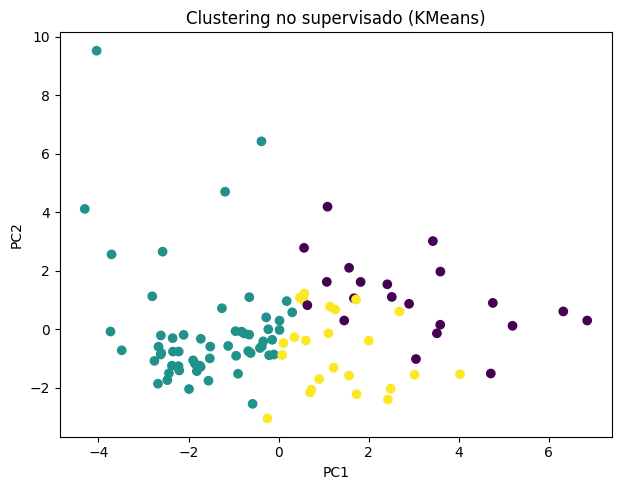

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# --- Gráfico 1: Clusters ---
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_plot['cluster'], cmap='viridis')
plt.title("Clustering no supervisado (KMeans)")
plt.xlabel("PC1")
plt.ylabel("PC2")


plt.tight_layout()
plt.show()


In [78]:
tabla = pd.crosstab(df_plot['cluster'], df_plot['ESTADO_FISICO_first'])
print(tabla)


ESTADO_FISICO_first  Bueno  Desconocido  Excelente  Malo  Regular
cluster                                                          
0                        9            4          2     1        5
1                       23           10          7     3       16
2                       13            0          1     0       10


In [79]:
df_plot['cluster']


0      1
1      1
2      2
3      1
4      0
      ..
99     0
100    0
101    0
102    1
103    2
Name: cluster, Length: 104, dtype: int32

In [80]:
# --- PREP ---
df_plot = df_plot.dropna(subset=['ESTADO_FISICO_first']).copy()

# Añadir PC1 y PC2 al dataframe si no existen
df_plot['PC1'] = X_pca[:, 0]
df_plot['PC2'] = X_pca[:, 1]

# Añadir cluster si no existe
df_plot['cluster'] = clusters

mintiendo = []

# --- LOOP ---
for idx, row in df_plot.iterrows():
    est = row['ESTADO_FISICO_first']
    cl = row['cluster']
    pc1 = row['PC1']
    
    # === SOBREESTIMACIÓN ===
    if cl == 2 and est in ['Bueno', 'Excelente']:
        mintiendo.append((idx, est, cl, pc1, "Sobreestima: bajo rendimiento pero declara buen estado"))
    
    if cl == 0 and est == 'Excelente':
        mintiendo.append((idx, est, cl, pc1, "Sobreestima: rendimiento medio pero declara excelente"))
    
    # === SUBESTIMACIÓN ===
    if cl == 1 and est == 'Malo':
        mintiendo.append((idx, est, cl, pc1, "Subestima: alto rendimiento pero declara estado malo"))
    
    if cl == 1 and est == 'Regular':
        mintiendo.append((idx, est, cl, pc1, "Subestima: alto rendimiento pero declara regular"))
    
    if cl == 0 and est == 'Malo':
        mintiendo.append((idx, est, cl, pc1, "Subestima: rendimiento medio pero declara estado malo"))

mintiendo_df = pd.DataFrame(mintiendo, columns=['index','estado_fisico','cluster','PC1','motivo'])
mintiendo_df


,index,estado_fisico,cluster,PC1,motivo
0,2,Bueno,2,0.551995,Sobreestima: bajo rendimiento pero declara bue...
1,7,Bueno,2,1.720576,Sobreestima: bajo rendimiento pero declara bue...
2,11,Bueno,2,3.019912,Sobreestima: bajo rendimiento pero declara bue...
3,14,Regular,1,-1.119219,Subestima: alto rendimiento pero declara regular
4,16,Regular,1,-0.764461,Subestima: alto rendimiento pero declara regular
5,17,Excelente,2,1.224401,Sobreestima: bajo rendimiento pero declara bue...
6,18,Regular,1,-0.650471,Subestima: alto rendimiento pero declara regular
7,19,Regular,1,-0.413264,Subestima: alto rendimiento pero declara regular
8,20,Regular,1,-2.206439,Subestima: alto rendimiento pero declara regular
9,25,Bueno,2,1.142059,Sobreestima: bajo rendimiento pero declara bue...


In [81]:
# Asegurar que index es una columna y no un índice
df_plot_reset = df_plot.reset_index()

# Merge para agregar nombre del jugador
mintiendo_df = mintiendo_df.merge(
    df_plot_reset[['index', 'player_name_clean', 'partido']], 
    on='index', 
    how='left'
)

mintiendo_df


,index,estado_fisico,cluster,PC1,motivo,player_name_clean,partido
0,2,Bueno,2,0.551995,Sobreestima: bajo rendimiento pero declara bue...,ANDREA JULIETH SOSA RODRIGUEZ,Partido 29
1,7,Bueno,2,1.720576,Sobreestima: bajo rendimiento pero declara bue...,CESAR CAMILO DIAZ CUFINO,9
2,11,Bueno,2,3.019912,Sobreestima: bajo rendimiento pero declara bue...,DAVID SANTIAGO MEDINA BUITRAGO,6
3,14,Regular,1,-1.119219,Subestima: alto rendimiento pero declara regular,DAVID SANTIAGO MURCIA BARRERA,31
4,16,Regular,1,-0.764461,Subestima: alto rendimiento pero declara regular,DAVID SANTIAGO MURCIA BARRERA,41
5,17,Excelente,2,1.224401,Sobreestima: bajo rendimiento pero declara bue...,FERMIN ALEJANDRO ESCALONA GUILLEN,6
6,18,Regular,1,-0.650471,Subestima: alto rendimiento pero declara regular,ISABELLA BUITRAGO HURTADO,11
7,19,Regular,1,-0.413264,Subestima: alto rendimiento pero declara regular,ISABELLA BUITRAGO HURTADO,31
8,20,Regular,1,-2.206439,Subestima: alto rendimiento pero declara regular,ISABELLA BUITRAGO HURTADO,Partido 22
9,25,Bueno,2,1.142059,Sobreestima: bajo rendimiento pero declara bue...,JONATAN NICOLAS MARMOLEJO LOPEZ,Partido 28


In [82]:
df_plot_original = df_plot.copy()  # para evitar daños


In [83]:
# Todos los índices detectados como mintiendo:
indices_mintiendo = set(mintiendo_df['index'].astype(int))

# Todos los índices del dataframe
todos_indices = set(df_plot.index)

# Los que NO están mintiendo:
indices_verdaderos = [i for i in df_plot_original.index if i not in indices_mintiendo]
verdaderos_df = df_plot_original.loc[indices_verdaderos].copy()
verdaderos_df



,player_name_clean,partido,player_speed_mps_mean,player_speed_mps_std,player_speed_mps_max,player_acceleration_mps2_mean,player_acceleration_mps2_std,player_acceleration_mps2_max,player_acceleration_mps2_min,distance_player_to_ball_m_mean,distance_player_to_ball_m_std,distance_player_to_net_m_mean,distance_player_to_net_m_std,distance_player_to_teammate_m_mean,distance_player_to_teammate_m_std,ball_displacement_sum,player_hits_ball_sum,duration_sum,duration_mean,total_frames_sum,video_duration_first,player_displacement_m_sum,player_displacement_m_mean,EDAD_first,ESTATURA_first,PRACTICA_OTRO_DEPORTE_RAQUETA_first,NIVEL_ACTUAL_PADEL_first,ESTADO_FISICO_first,FRECUENCIA_DEPORTE_first,cluster,PC1,PC2
0,ANDREA JULIETH SOSA RODRIGUEZ,17,0.994176,0.740275,2.280419,-0.030523,0.105733,1.037143e-14,-3.662711e-01,5.860039,1.736788,2.901612,0.494912,3.241905,1.001009,0.0,12,98.133333,8.177778,757707,6.700000,5.368553,0.447379,20,162,Tenis,Primera vez,Bueno,3-4 veces,1,-0.942422,-0.905691
1,ANDREA JULIETH SOSA RODRIGUEZ,23,1.282758,0.734321,2.503158,-0.010876,0.153363,1.851334e-01,-3.085557e-01,7.686406,2.221061,8.449625,1.658551,4.795484,0.702167,0.0,16,75.466667,8.385185,595450,7.000000,5.195168,0.577241,20,162,Tenis,Primera vez,Bueno,3-4 veces,1,-0.142091,-0.358736
3,CARLOS FELIPE ANDRADE SAENZ,1,0.573388,0.356024,1.351810,0.045580,0.405726,8.931875e-01,-4.278293e-01,7.200342,2.443118,8.526679,0.443467,5.296399,0.000000,0.0,19,51.766667,7.395238,614810,22.133333,1.806172,0.258025,20,172,Desconocido,Desconocido,Desconocido,Desconocido,1,-1.750289,-1.242081
4,CARLOS FELIPE ANDRADE SAENZ,19,2.737854,1.750381,6.150522,-0.018910,0.203126,3.886388e-01,-3.181981e-01,9.140136,2.537018,8.124200,1.803689,8.057738,0.000000,0.0,5,105.533333,11.725926,1248068,13.933333,21.380848,2.375650,20,172,Desconocido,Desconocido,Desconocido,Desconocido,0,3.428138,3.017030
5,CARLOS FELIPE ANDRADE SAENZ,21,2.916290,1.290365,5.320689,0.064038,0.113164,3.222259e-01,-7.666795e-14,4.714350,1.988304,4.497453,1.350957,4.386243,2.077504,0.0,14,105.233333,10.523333,1089765,13.233333,13.123307,1.312331,20,172,Desconocido,Desconocido,Desconocido,Desconocido,0,1.674434,1.061954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,VALENTINA ALEJANDRA LOPEZ ROMERO,41,1.870836,1.266859,4.248659,-0.033380,0.193403,2.892710e-01,-3.048604e-01,9.018657,2.419875,6.525155,0.769259,6.807694,0.412367,0.0,0,69.833333,11.638889,943801,16.566667,5.051256,0.841876,21,165,No,Primera vez,Bueno,3-4 veces,1,0.180585,0.964372
99,VALENTINA ALEJANDRA LOPEZ ROMERO,Partido 27,1.622239,1.139100,4.105505,0.124708,0.466865,9.651505e-01,-9.091373e-01,7.881140,1.720145,4.260263,1.836631,6.566910,1.478144,0.0,4,164.533333,13.711111,3262411,10.000000,11.660354,0.971696,21,165,No,Primera vez,Bueno,3-4 veces,0,1.071681,1.621697
100,VALENTINA ALEJANDRA LOPEZ ROMERO,Partido 28,2.903245,1.625764,4.886499,-0.009848,0.472816,6.324433e-01,-9.538490e-01,6.313621,1.394952,8.163087,0.754145,3.361113,0.850356,0.0,63,65.133333,7.237037,2048266,6.200000,15.797399,1.755267,21,165,No,Primera vez,Bueno,3-4 veces,0,2.899439,0.871791
101,VALENTINA JIMENEZ GOMEZ,11,2.321542,1.727769,6.391630,-0.077383,0.757632,9.486650e-01,-1.899690e+00,8.460586,1.783678,5.438010,3.075551,5.035445,0.248605,0.0,0,121.766667,12.176667,1808885,24.166667,16.500731,1.650073,19,160,Tenis de mesa,Primera vez,Bueno,3-4 veces,0,3.594163,1.973778


In [84]:
len(df_plot_original), len(mintiendo_df), len(verdaderos_df)


(104, 36, 68)

In [85]:
# 1. Mostrar todos los nombres sin repetir
nombres_verdaderos = verdaderos_df['player_name_clean'].unique()
nombres_verdaderos

# 2. Mostrar por partido
verdaderos_df[['player_name_clean', 'partido']]

# 3. Contar cuántas veces dijeron la verdad
verdaderos_df['player_name_clean'].value_counts()


player_name_clean
MARIA JOSE CIFUENTES                     5
SERGIO ANDRES LOPEZ RODRIGUEZ            4
JUAN PABLO APONTE VELOZA                 3
JUAN PABLO VARGAS JIMENEZ                3
CARLOS FELIPE ANDRADE SAENZ              3
CRISTIAN STEVAN SOTO ZAPATA              3
NICOLAS NAVARRO                          3
SANTIAGO GUTIERREZ DE PINERES BARBOSA    3
JORGE ENRIQUE LUGO LOPEZ                 3
VALENTINA ALEJANDRA LOPEZ ROMERO         3
JUAN MIGUEL VENEGAS GARZON               2
JONATAN NICOLAS MARMOLEJO LOPEZ          2
DAVID SANTIAGO MEDINA BUITRAGO           2
ANDREA JULIETH SOSA RODRIGUEZ            2
TOMAS BARRIOS GUEVARA                    2
SARA JULIANA SOLANO BOADA                2
JULIANA BELTRAN DIAZ                     2
JUAN PABLO BENITEZ BERNAL                2
JAIME ANDRES CASTILLO ALVAREZ            2
SAMUEL ANDRES RODRIGUEZ ULLOA            2
LUIS MARIO RAMIREZ MUNOZ                 2
NICOLE LIZARAZO                          2
VALENTINA JIMENEZ GOMEZ             

In [86]:
import umap

reducer = umap.UMAP(
    n_neighbors=20,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

X_umap = reducer.fit_transform(X_scaled)


c:\Users\tabut\OneDrive\Escritorio\Analitica e Datos\Proyecto_Final\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\tabut\OneDrive\Escritorio\Analitica e Datos\Proyecto_Final\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [87]:
kmeans_umap = KMeans(n_clusters=3, random_state=42)
clusters_umap = kmeans_umap.fit_predict(X_umap)

df_plot['cluster_umap'] = clusters_umap


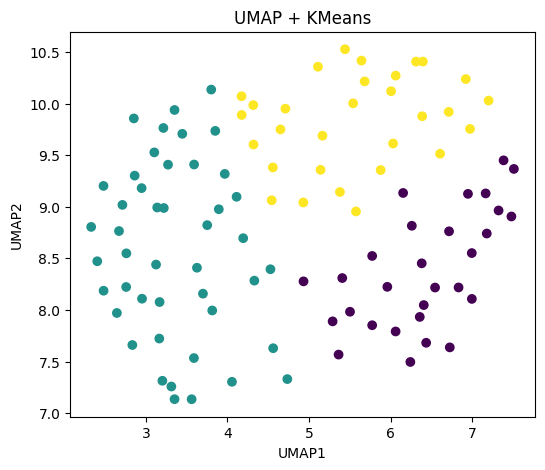

In [88]:
plt.figure(figsize=(6,5))
plt.scatter(X_umap[:,0], X_umap[:,1], c=clusters_umap, cmap='viridis')
plt.title("UMAP + KMeans")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()


In [89]:
df_plot['cluster'] = df_plot['cluster_umap']  # reemplazar clusters PCA por UMAP


In [90]:
df_plot['cluster_umap'] = clusters_umap


In [91]:
from xgboost import XGBClassifier
import pandas as pd

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_unsup, df_plot['cluster_umap'])


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [92]:
importances = pd.DataFrame({
    'variable': variables_fisicas,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

importances


,variable,importance
2,player_speed_mps_max,0.148858
20,player_displacement_m_mean,0.128817
5,player_acceleration_mps2_max,0.089119
19,player_displacement_m_sum,0.074901
16,duration_mean,0.051993
11,distance_player_to_teammate_m_mean,0.051872
1,player_speed_mps_std,0.047845
14,player_hits_ball_sum,0.043345
3,player_acceleration_mps2_mean,0.036874
8,distance_player_to_ball_m_std,0.035689


In [93]:
cluster_stats = df_plot.groupby('cluster_umap')[variables_fisicas].mean()
cluster_stats


,player_speed_mps_mean,player_speed_mps_std,player_speed_mps_max,player_acceleration_mps2_mean,player_acceleration_mps2_std,player_acceleration_mps2_max,player_acceleration_mps2_min,distance_player_to_ball_m_mean,distance_player_to_ball_m_std,distance_player_to_net_m_mean,distance_player_to_net_m_std,distance_player_to_teammate_m_mean,distance_player_to_teammate_m_std,ball_displacement_sum,player_hits_ball_sum,duration_sum,duration_mean,total_frames_sum,video_duration_first,player_displacement_m_sum,player_displacement_m_mean,EDAD_first,ESTATURA_first
cluster_umap,,,,,,,,,,,,,,,,,,,,,,,
0,2.180262,1.518787,5.056681,-0.074501,0.461502,0.555587,-0.976838,6.572028,1.815378,5.698721,1.616596,4.762704,0.980112,0.0,31.379310,87.342529,8.682032,1.134814e+06,8.150575,11.560431,1.197378,20.172414,171.034483
1,0.779242,0.499340,1.812317,0.036955,0.263479,0.500172,-0.345074,5.777103,1.310406,4.698030,0.782602,5.441399,0.706714,0.0,44.711111,117.199259,11.961117,2.512732e+06,11.643333,2.536859,0.265124,19.733333,172.022222
2,1.793367,1.408266,4.825501,0.099518,0.665741,1.424755,-0.813271,6.586444,1.649394,4.024325,0.947563,5.629921,0.646388,0.0,22.266667,120.389444,11.891223,2.149179e+06,7.797222,6.510739,0.658928,19.300000,172.400000


In [94]:
cluster_mapping = {
    0: "Alto rendimiento",
    2: "Rendimiento medio",
    1: "Bajo rendimiento"
}

df_plot["nivel_rendimiento"] = df_plot["cluster_umap"].map(cluster_mapping)
df_plot[["cluster_umap", "nivel_rendimiento"]].head()



,cluster_umap,nivel_rendimiento
0,1,Bajo rendimiento
1,0,Alto rendimiento
2,2,Rendimiento medio
3,1,Bajo rendimiento
4,0,Alto rendimiento


In [95]:
df_plot.head()

,player_name_clean,partido,player_speed_mps_mean,player_speed_mps_std,player_speed_mps_max,player_acceleration_mps2_mean,player_acceleration_mps2_std,player_acceleration_mps2_max,player_acceleration_mps2_min,distance_player_to_ball_m_mean,distance_player_to_ball_m_std,distance_player_to_net_m_mean,distance_player_to_net_m_std,distance_player_to_teammate_m_mean,distance_player_to_teammate_m_std,ball_displacement_sum,player_hits_ball_sum,duration_sum,duration_mean,total_frames_sum,video_duration_first,player_displacement_m_sum,player_displacement_m_mean,EDAD_first,ESTATURA_first,PRACTICA_OTRO_DEPORTE_RAQUETA_first,NIVEL_ACTUAL_PADEL_first,ESTADO_FISICO_first,FRECUENCIA_DEPORTE_first,cluster,PC1,PC2,cluster_umap,nivel_rendimiento
0,ANDREA JULIETH SOSA RODRIGUEZ,17,0.994176,0.740275,2.280419,-0.030523,0.105733,1.037143e-14,-0.366271,5.860039,1.736788,2.901612,0.494912,3.241905,1.001009,0.0,12,98.133333,8.177778,757707,6.700000,5.368553,0.447379,20,162,Tenis,Primera vez,Bueno,3-4 veces,1,-0.942422,-0.905691,1,Bajo rendimiento
1,ANDREA JULIETH SOSA RODRIGUEZ,23,1.282758,0.734321,2.503158,-0.010876,0.153363,1.851334e-01,-0.308556,7.686406,2.221061,8.449625,1.658551,4.795484,0.702167,0.0,16,75.466667,8.385185,595450,7.000000,5.195168,0.577241,20,162,Tenis,Primera vez,Bueno,3-4 veces,0,-0.142091,-0.358736,0,Alto rendimiento
2,ANDREA JULIETH SOSA RODRIGUEZ,Partido 29,1.776705,1.270778,4.605290,0.157706,0.369875,9.737208e-01,-0.294287,7.284096,1.967448,3.308851,1.085917,6.215994,0.849179,0.0,0,148.400000,12.366667,2113794,8.166667,9.594208,0.799517,20,162,Tenis,Primera vez,Bueno,3-4 veces,2,0.551995,1.006443,2,Rendimiento medio
3,CARLOS FELIPE ANDRADE SAENZ,1,0.573388,0.356024,1.351810,0.045580,0.405726,8.931875e-01,-0.427829,7.200342,2.443118,8.526679,0.443467,5.296399,0.000000,0.0,19,51.766667,7.395238,614810,22.133333,1.806172,0.258025,20,172,Desconocido,Desconocido,Desconocido,Desconocido,1,-1.750289,-1.242081,1,Bajo rendimiento
4,CARLOS FELIPE ANDRADE SAENZ,19,2.737854,1.750381,6.150522,-0.018910,0.203126,3.886388e-01,-0.318198,9.140136,2.537018,8.124200,1.803689,8.057738,0.000000,0.0,5,105.533333,11.725926,1248068,13.933333,21.380848,2.375650,20,172,Desconocido,Desconocido,Desconocido,Desconocido,0,3.428138,3.017030,0,Alto rendimiento


In [96]:
df_plot['nivel_real'] = pd.qcut(df_plot['PC1'], q=3, labels=[
    "Bajo rendimiento", 
    "Rendimiento medio", 
    "Alto rendimiento"
])


In [97]:
mintiendo = []

for idx, row in df_plot.iterrows():
    est = row['ESTADO_FISICO_first']
    nivel = row['nivel_real']   # hecho con PCA
    
    # SOBREESTIMACIÓN
    if nivel == "Bajo rendimiento" and est in ["Bueno", "Excelente"]:
        mintiendo.append((idx, row['player_name_clean'], nivel, est,
                          "Sobreestima: bajo rendimiento pero declaró buen estado"))
    
    if nivel == "Rendimiento medio" and est == "Excelente":
        mintiendo.append((idx, row['player_name_clean'], nivel, est,
                          "Sobreestima: rendimiento medio pero declaró excelente"))
    
    # SUBESTIMACIÓN
    if nivel == "Alto rendimiento" and est in ["Malo", "Regular"]:
        mintiendo.append((idx, row['player_name_clean'], nivel, est,
                          "Subestima: alto rendimiento pero declaró mal"))
    
    if nivel == "Rendimiento medio" and est == "Malo":
        mintiendo.append((idx, row['player_name_clean'], nivel, est,
                          "Subestima: rendimiento medio pero declaró mal"))

mintiendo_df = pd.DataFrame(
    mintiendo,
    columns=['index','player_name_clean','nivel_real','estado_declarado','motivo']
)

mintiendo_df



,index,player_name_clean,nivel_real,estado_declarado,motivo
0,6,CESAR CAMILO DIAZ CUFINO,Bajo rendimiento,Bueno,Sobreestima: bajo rendimiento pero declaró bue...
1,9,CRISTIAN STEVAN SOTO ZAPATA,Bajo rendimiento,Bueno,Sobreestima: bajo rendimiento pero declaró bue...
2,12,DAVID SANTIAGO MEDINA BUITRAGO,Bajo rendimiento,Bueno,Sobreestima: bajo rendimiento pero declaró bue...
3,15,DAVID SANTIAGO MURCIA BARRERA,Alto rendimiento,Regular,Subestima: alto rendimiento pero declaró mal
4,24,JONATAN NICOLAS MARMOLEJO LOPEZ,Bajo rendimiento,Bueno,Sobreestima: bajo rendimiento pero declaró bue...
5,31,JUAN MIGUEL VENEGAS GARZON,Alto rendimiento,Regular,Subestima: alto rendimiento pero declaró mal
6,32,JUAN PABLO APONTE VELOZA,Bajo rendimiento,Excelente,Sobreestima: bajo rendimiento pero declaró bue...
7,33,JUAN PABLO APONTE VELOZA,Rendimiento medio,Excelente,Sobreestima: rendimiento medio pero declaró ex...
8,34,JUAN PABLO APONTE VELOZA,Rendimiento medio,Excelente,Sobreestima: rendimiento medio pero declaró ex...
9,35,JUAN PABLO BENITEZ BERNAL,Rendimiento medio,Excelente,Sobreestima: rendimiento medio pero declaró ex...


In [98]:
matches.head()
matches.shape

(104, 29)

In [99]:
variables_fisicas = [
    c for c in matches.columns 
    if matches[c].dtype != 'object' 
    and c not in ['cluster', 'cluster_umap', 'PC1', 'PC2']
]

print("Variables usadas en UMAP:", variables_fisicas)


Variables usadas en UMAP: ['player_speed_mps_mean', 'player_speed_mps_std', 'player_speed_mps_max', 'player_acceleration_mps2_mean', 'player_acceleration_mps2_std', 'player_acceleration_mps2_max', 'player_acceleration_mps2_min', 'distance_player_to_ball_m_mean', 'distance_player_to_ball_m_std', 'distance_player_to_net_m_mean', 'distance_player_to_net_m_std', 'distance_player_to_teammate_m_mean', 'distance_player_to_teammate_m_std', 'ball_displacement_sum', 'player_hits_ball_sum', 'duration_sum', 'duration_mean', 'total_frames_sum', 'video_duration_first', 'player_displacement_m_sum', 'player_displacement_m_mean', 'EDAD_first', 'ESTATURA_first']


In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(matches[variables_fisicas])


In [101]:
import umap

umap_model = umap.UMAP(
    n_neighbors=15,      # controla la estructura local
    min_dist=0.1,        # más separación entre clústeres
    n_components=2,
    random_state=42
)

X_umap = umap_model.fit_transform(X_scaled)

matches['UMAP1'] = X_umap[:,0]
matches['UMAP2'] = X_umap[:,1]


c:\Users\tabut\OneDrive\Escritorio\Analitica e Datos\Proyecto_Final\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [102]:
from sklearn.cluster import KMeans

kmeans_umap = KMeans(n_clusters=3, random_state=42)
matches['cluster_umap'] = kmeans_umap.fit_predict(X_umap)


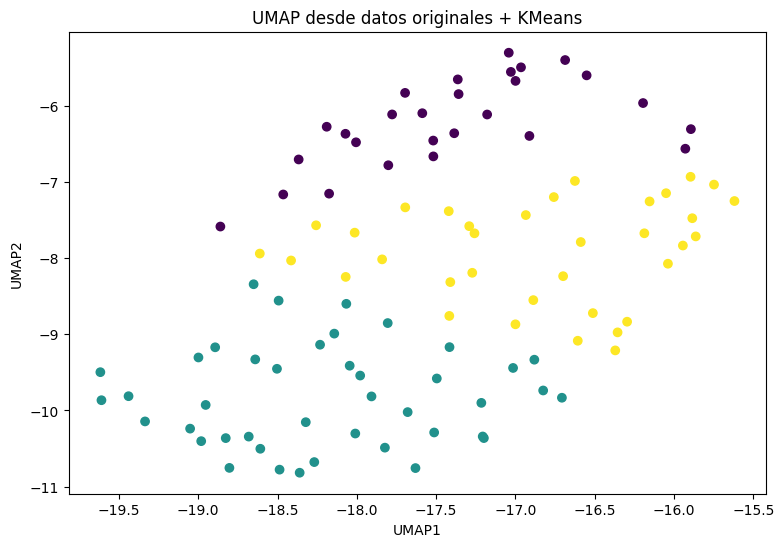

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.scatter(matches['UMAP1'], matches['UMAP2'], c=matches['cluster_umap'], cmap='viridis')
plt.title("UMAP desde datos originales + KMeans")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()


In [104]:
cluster_stats = matches.groupby('cluster_umap')[variables_fisicas].mean()
cluster_stats


,player_speed_mps_mean,player_speed_mps_std,player_speed_mps_max,player_acceleration_mps2_mean,player_acceleration_mps2_std,player_acceleration_mps2_max,player_acceleration_mps2_min,distance_player_to_ball_m_mean,distance_player_to_ball_m_std,distance_player_to_net_m_mean,distance_player_to_net_m_std,distance_player_to_teammate_m_mean,distance_player_to_teammate_m_std,ball_displacement_sum,player_hits_ball_sum,duration_sum,duration_mean,total_frames_sum,video_duration_first,player_displacement_m_sum,player_displacement_m_mean,EDAD_first,ESTATURA_first
cluster_umap,,,,,,,,,,,,,,,,,,,,,,,
0,2.256612,1.560879,5.177552,-0.073968,0.588411,0.718012,-1.268662,6.455364,1.763255,5.590466,1.670721,4.569436,0.956236,0.0,30.703704,82.679012,8.155218,1.034621e+06,8.181481,12.053628,1.241162,20.037037,171.777778
1,0.727985,0.468178,1.653693,0.028924,0.269625,0.501348,-0.362336,5.720977,1.314078,4.709164,0.782023,5.329081,0.696766,0.0,46.023810,103.795635,10.794439,2.181618e+06,11.876587,2.212830,0.239184,19.642857,171.761905
2,1.731160,1.341598,4.677544,0.093437,0.514314,1.169127,-0.536651,6.673597,1.665627,4.247901,0.930596,5.848082,0.700986,0.0,23.657143,137.909524,13.520245,2.597005e+06,7.843333,6.467044,0.653293,19.600000,172.028571


In [105]:
cluster_mapping = {
    0: "Alto rendimiento",
    2: "Rendimiento medio",
    1: "Bajo rendimiento"
}

matches['nivel_rendimiento'] = matches['cluster_umap'].map(cluster_mapping)


In [106]:
mintiendo = []

for idx, row in matches.iterrows():
    est = row['ESTADO_FISICO_first']
    nivel = row['nivel_rendimiento']
    
    # SOBREESTIMACIÓN
    if nivel == "Bajo rendimiento" and est in ["Bueno", "Excelente"]:
        mintiendo.append((row['player_name_clean'], est, nivel, "Sobreestima su estado físico"))
    
    if nivel == "Rendimiento medio" and est == "Excelente":
        mintiendo.append((row['player_name_clean'], est, nivel, "Sobreestima su estado físico"))

    # SUBESTIMACIÓN
    if nivel == "Alto rendimiento" and est in ["Malo", "Regular"]:
        mintiendo.append((row['player_name_clean'], est, nivel, "Subestima su estado físico"))
    
    if nivel == "Rendimiento medio" and est == "Malo":
        mintiendo.append((row['player_name_clean'], est, nivel, "Subestima su estado físico"))

mintiendo_df = pd.DataFrame(mintiendo, columns=[
    'player_name_clean', 'estado_declarado', 'nivel_rendimiento', 'motivo'
])

mintiendo_df


,player_name_clean,estado_declarado,nivel_rendimiento,motivo
0,ANDREA JULIETH SOSA RODRIGUEZ,Bueno,Bajo rendimiento,Sobreestima su estado físico
1,CESAR CAMILO DIAZ CUFINO,Bueno,Bajo rendimiento,Sobreestima su estado físico
2,CRISTIAN STEVAN SOTO ZAPATA,Bueno,Bajo rendimiento,Sobreestima su estado físico
3,DAVID SANTIAGO MEDINA BUITRAGO,Bueno,Bajo rendimiento,Sobreestima su estado físico
4,FERMIN ALEJANDRO ESCALONA GUILLEN,Excelente,Rendimiento medio,Sobreestima su estado físico
5,ISABELLA BUITRAGO HURTADO,Regular,Alto rendimiento,Subestima su estado físico
6,JONATAN NICOLAS MARMOLEJO LOPEZ,Bueno,Bajo rendimiento,Sobreestima su estado físico
7,JUAN PABLO APONTE VELOZA,Excelente,Bajo rendimiento,Sobreestima su estado físico
8,JUAN PABLO APONTE VELOZA,Excelente,Rendimiento medio,Sobreestima su estado físico
9,JUAN PABLO APONTE VELOZA,Excelente,Bajo rendimiento,Sobreestima su estado físico


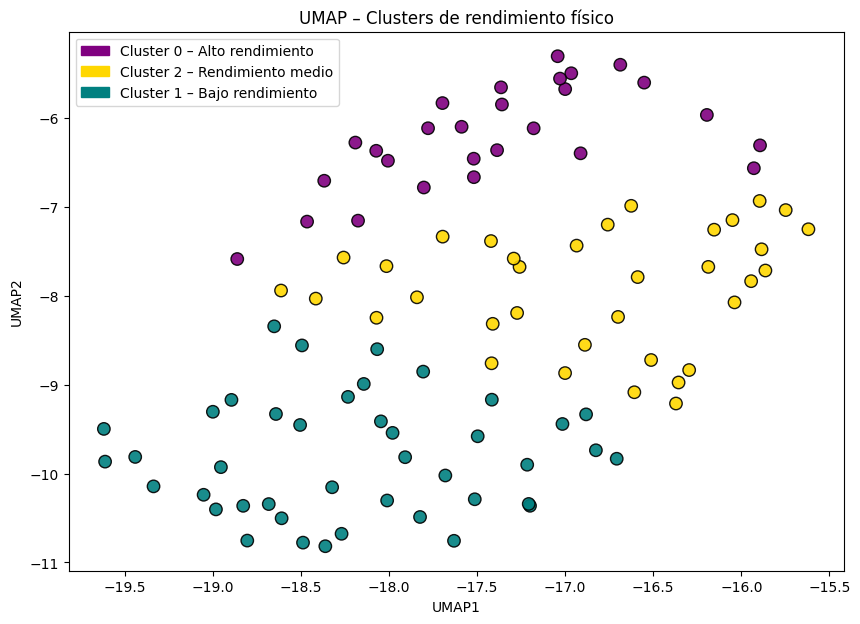

In [107]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colores_cluster = {
    0: "purple",     # Alto rendimiento
    1: "teal",       # Bajo rendimiento
    2: "gold"        # Medio rendimiento
}

plt.figure(figsize=(10,7))
plt.scatter(
    matches["UMAP1"],
    matches["UMAP2"],
    c=matches["cluster_umap"].map(colores_cluster),
    s=80, alpha=0.9, edgecolor="black"
)

plt.title("UMAP – Clusters de rendimiento físico")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

legend_patches = [
    mpatches.Patch(color="purple", label="Cluster 0 – Alto rendimiento"),
    mpatches.Patch(color="gold", label="Cluster 2 – Rendimiento medio"),
    mpatches.Patch(color="teal", label="Cluster 1 – Bajo rendimiento")
]
plt.legend(handles=legend_patches)
plt.show()


In [108]:
matches.head()

,player_name_clean,partido,player_speed_mps_mean,player_speed_mps_std,player_speed_mps_max,player_acceleration_mps2_mean,player_acceleration_mps2_std,player_acceleration_mps2_max,player_acceleration_mps2_min,distance_player_to_ball_m_mean,distance_player_to_ball_m_std,distance_player_to_net_m_mean,distance_player_to_net_m_std,distance_player_to_teammate_m_mean,distance_player_to_teammate_m_std,ball_displacement_sum,player_hits_ball_sum,duration_sum,duration_mean,total_frames_sum,video_duration_first,player_displacement_m_sum,player_displacement_m_mean,EDAD_first,ESTATURA_first,PRACTICA_OTRO_DEPORTE_RAQUETA_first,NIVEL_ACTUAL_PADEL_first,ESTADO_FISICO_first,FRECUENCIA_DEPORTE_first,UMAP1,UMAP2,cluster_umap,nivel_rendimiento
0,ANDREA JULIETH SOSA RODRIGUEZ,17,0.994176,0.740275,2.280419,-0.030523,0.105733,1.037143e-14,-0.366271,5.860039,1.736788,2.901612,0.494912,3.241905,1.001009,0.0,12,98.133333,8.177778,757707,6.700000,5.368553,0.447379,20,162,Tenis,Primera vez,Bueno,3-4 veces,-17.907768,-9.816504,1,Bajo rendimiento
1,ANDREA JULIETH SOSA RODRIGUEZ,23,1.282758,0.734321,2.503158,-0.010876,0.153363,1.851334e-01,-0.308556,7.686406,2.221061,8.449625,1.658551,4.795484,0.702167,0.0,16,75.466667,8.385185,595450,7.000000,5.195168,0.577241,20,162,Tenis,Primera vez,Bueno,3-4 veces,-18.464207,-7.167356,0,Alto rendimiento
2,ANDREA JULIETH SOSA RODRIGUEZ,Partido 29,1.776705,1.270778,4.605290,0.157706,0.369875,9.737208e-01,-0.294287,7.284096,1.967448,3.308851,1.085917,6.215994,0.849179,0.0,0,148.400000,12.366667,2113794,8.166667,9.594208,0.799517,20,162,Tenis,Primera vez,Bueno,3-4 veces,-16.588406,-7.791146,2,Rendimiento medio
3,CARLOS FELIPE ANDRADE SAENZ,1,0.573388,0.356024,1.351810,0.045580,0.405726,8.931875e-01,-0.427829,7.200342,2.443118,8.526679,0.443467,5.296399,0.000000,0.0,19,51.766667,7.395238,614810,22.133333,1.806172,0.258025,20,172,Desconocido,Desconocido,Desconocido,Desconocido,-19.617188,-9.498439,1,Bajo rendimiento
4,CARLOS FELIPE ANDRADE SAENZ,19,2.737854,1.750381,6.150522,-0.018910,0.203126,3.886388e-01,-0.318198,9.140136,2.537018,8.124200,1.803689,8.057738,0.000000,0.0,5,105.533333,11.725926,1248068,13.933333,21.380848,2.375650,20,172,Desconocido,Desconocido,Desconocido,Desconocido,-17.777775,-6.117346,0,Alto rendimiento


In [109]:
import pandas as pd

def evaluar_declaracion(estado_decl, rendimiento_real):
    # --- SOBREESTIMACIÓN ---
    if rendimiento_real == "Bajo rendimiento" and estado_decl in ["Bueno", "Excelente"]:
        return "Sobreestimó"
    if rendimiento_real == "Rendimiento medio" and estado_decl == "Excelente":
        return "Sobreestimó"

    # --- SUBESTIMACIÓN ---
    if rendimiento_real == "Alto rendimiento" and estado_decl in ["Malo", "Regular"]:
        return "Subestimó"
    if rendimiento_real == "Rendimiento medio" and estado_decl == "Malo":
        return "Subestimó"

    # --- DECLARÓ BIEN ---
    return "Declaró correctamente"


def generar_recomendacion(evaluacion, rendimiento_real):
    if evaluacion == "Sobreestimó":
        if rendimiento_real == "Bajo rendimiento":
            return (
                "Reduce la intensidad declarada. "
                "Tu rendimiento mostró baja movilidad y velocidad. "
                "Recomendación: mejorar resistencia aeróbica y agilidad lateral."
            )
        if rendimiento_real == "Rendimiento medio":
            return (
                "Estás bien, pero no al nivel de 'excelente'. "
                "Recomendación: trabajar explosividad y sprints cortos."
            )

    if evaluacion == "Subestimó":
        if rendimiento_real == "Alto rendimiento":
            return (
                "Tu rendimiento real fue mucho mejor de lo que declaraste. "
                "Recomendación: reconoce tu buen estado y mantén continuidad de entrenamiento."
            )
        if rendimiento_real == "Rendimiento medio":
            return (
                "Tienes un rendimiento aceptable, no tan malo como creías. "
                "Recomendación: continúa entrenando y mejora consistencia."
            )

    if evaluacion == "Declaró correctamente":
        if rendimiento_real == "Alto rendimiento":
            return (
                "Coincide con tu rendimiento. Sigue con sesiones de potencia, "
                "agilidad y mantenimiento físico."
            )
        if rendimiento_real == "Rendimiento medio":
            return (
                "Buen autoconocimiento. "
                "Recomendación: mejorar resistencia y aceleraciones en puntos largos."
            )
        if rendimiento_real == "Bajo rendimiento":
            return (
                "Correcto. Tu rendimiento muestra necesidad de mejorar condición física. "
                "Recomendación: comenzar con trabajo aeróbico base y desplazamientos."
            )

    return "Sin recomendación disponible."


# === GENERAR TABLA FINAL ===

tabla_final = matches[[
    "player_name_clean",
    "ESTADO_FISICO_first",
    "nivel_rendimiento"
]].copy()

tabla_final["evaluacion"] = tabla_final.apply(
    lambda row: evaluar_declaracion(row["ESTADO_FISICO_first"], row["nivel_rendimiento"]),
    axis=1
)

tabla_final["recomendacion"] = tabla_final.apply(
    lambda row: generar_recomendacion(row["evaluacion"], row["nivel_rendimiento"]),
    axis=1
)

tabla_final


,player_name_clean,ESTADO_FISICO_first,nivel_rendimiento,evaluacion,recomendacion
0,ANDREA JULIETH SOSA RODRIGUEZ,Bueno,Bajo rendimiento,Sobreestimó,Reduce la intensidad declarada. Tu rendimiento...
1,ANDREA JULIETH SOSA RODRIGUEZ,Bueno,Alto rendimiento,Declaró correctamente,Coincide con tu rendimiento. Sigue con sesione...
2,ANDREA JULIETH SOSA RODRIGUEZ,Bueno,Rendimiento medio,Declaró correctamente,Buen autoconocimiento. Recomendación: mejorar ...
3,CARLOS FELIPE ANDRADE SAENZ,Desconocido,Bajo rendimiento,Declaró correctamente,Correcto. Tu rendimiento muestra necesidad de ...
4,CARLOS FELIPE ANDRADE SAENZ,Desconocido,Alto rendimiento,Declaró correctamente,Coincide con tu rendimiento. Sigue con sesione...
...,...,...,...,...,...
99,VALENTINA ALEJANDRA LOPEZ ROMERO,Bueno,Rendimiento medio,Declaró correctamente,Buen autoconocimiento. Recomendación: mejorar ...
100,VALENTINA ALEJANDRA LOPEZ ROMERO,Bueno,Alto rendimiento,Declaró correctamente,Coincide con tu rendimiento. Sigue con sesione...
101,VALENTINA JIMENEZ GOMEZ,Bueno,Alto rendimiento,Declaró correctamente,Coincide con tu rendimiento. Sigue con sesione...
102,VALENTINA JIMENEZ GOMEZ,Bueno,Bajo rendimiento,Sobreestimó,Reduce la intensidad declarada. Tu rendimiento...


In [114]:
df_plot.head()

,player_name_clean,partido,player_speed_mps_mean,player_speed_mps_std,player_speed_mps_max,player_acceleration_mps2_mean,player_acceleration_mps2_std,player_acceleration_mps2_max,player_acceleration_mps2_min,distance_player_to_ball_m_mean,distance_player_to_ball_m_std,distance_player_to_net_m_mean,distance_player_to_net_m_std,distance_player_to_teammate_m_mean,distance_player_to_teammate_m_std,ball_displacement_sum,player_hits_ball_sum,duration_sum,duration_mean,total_frames_sum,video_duration_first,player_displacement_m_sum,player_displacement_m_mean,EDAD_first,ESTATURA_first,PRACTICA_OTRO_DEPORTE_RAQUETA_first,NIVEL_ACTUAL_PADEL_first,ESTADO_FISICO_first,FRECUENCIA_DEPORTE_first,cluster,PC1,PC2,cluster_umap,nivel_rendimiento,nivel_real
0,ANDREA JULIETH SOSA RODRIGUEZ,17,0.994176,0.740275,2.280419,-0.030523,0.105733,1.037143e-14,-0.366271,5.860039,1.736788,2.901612,0.494912,3.241905,1.001009,0.0,12,98.133333,8.177778,757707,6.700000,5.368553,0.447379,20,162,Tenis,Primera vez,Bueno,3-4 veces,1,-0.942422,-0.905691,1,Bajo rendimiento,Rendimiento medio
1,ANDREA JULIETH SOSA RODRIGUEZ,23,1.282758,0.734321,2.503158,-0.010876,0.153363,1.851334e-01,-0.308556,7.686406,2.221061,8.449625,1.658551,4.795484,0.702167,0.0,16,75.466667,8.385185,595450,7.000000,5.195168,0.577241,20,162,Tenis,Primera vez,Bueno,3-4 veces,0,-0.142091,-0.358736,0,Alto rendimiento,Rendimiento medio
2,ANDREA JULIETH SOSA RODRIGUEZ,Partido 29,1.776705,1.270778,4.605290,0.157706,0.369875,9.737208e-01,-0.294287,7.284096,1.967448,3.308851,1.085917,6.215994,0.849179,0.0,0,148.400000,12.366667,2113794,8.166667,9.594208,0.799517,20,162,Tenis,Primera vez,Bueno,3-4 veces,2,0.551995,1.006443,2,Rendimiento medio,Rendimiento medio
3,CARLOS FELIPE ANDRADE SAENZ,1,0.573388,0.356024,1.351810,0.045580,0.405726,8.931875e-01,-0.427829,7.200342,2.443118,8.526679,0.443467,5.296399,0.000000,0.0,19,51.766667,7.395238,614810,22.133333,1.806172,0.258025,20,172,Desconocido,Desconocido,Desconocido,Desconocido,1,-1.750289,-1.242081,1,Bajo rendimiento,Bajo rendimiento
4,CARLOS FELIPE ANDRADE SAENZ,19,2.737854,1.750381,6.150522,-0.018910,0.203126,3.886388e-01,-0.318198,9.140136,2.537018,8.124200,1.803689,8.057738,0.000000,0.0,5,105.533333,11.725926,1248068,13.933333,21.380848,2.375650,20,172,Desconocido,Desconocido,Desconocido,Desconocido,0,3.428138,3.017030,0,Alto rendimiento,Alto rendimiento


In [118]:
from sklearn.metrics import silhouette_score

X_umap_coords = matches[["UMAP1", "UMAP2"]]
sil = silhouette_score(X_umap_coords, matches["cluster_umap"])
sil


0.3945547342300415

In [125]:
import re

def extraer_numero_partido(x):
    if isinstance(x, str):
        nums = re.findall(r'\d+', x)
        if nums:
            return int(nums[0])
    return int(x)

matches["partido_num"] = matches["partido"].apply(extraer_numero_partido)


In [126]:
matches_ordenado = matches.sort_values(
    ["player_name_clean", "partido_num"]
)


In [127]:
mapa_nivel_num = {
    "Bajo rendimiento": 1,
    "Rendimiento medio": 2,
    "Alto rendimiento": 0
}

matches_ordenado["nivel_num"] = matches_ordenado["nivel_rendimiento"].map(mapa_nivel_num)


In [128]:
import matplotlib.pyplot as plt

def graficar_evolucion(nombre):
    df_j = matches_ordenado[matches_ordenado["player_name_clean"] == nombre]

    plt.figure(figsize=(9,5))
    plt.plot(
        df_j["partido_num"],
        df_j["nivel_num"],
        marker="o",
        linewidth=3,
        color="purple"
    )

    plt.xticks(df_j["partido_num"])
    plt.yticks([0,1,2], ["Bajo", "Medio", "Alto"])

    plt.xlabel("Partido")
    plt.ylabel("Rendimiento físico (UMAP)")
    plt.title(f"Evolución del rendimiento: {nombre}")
    plt.grid(True)
    plt.show()


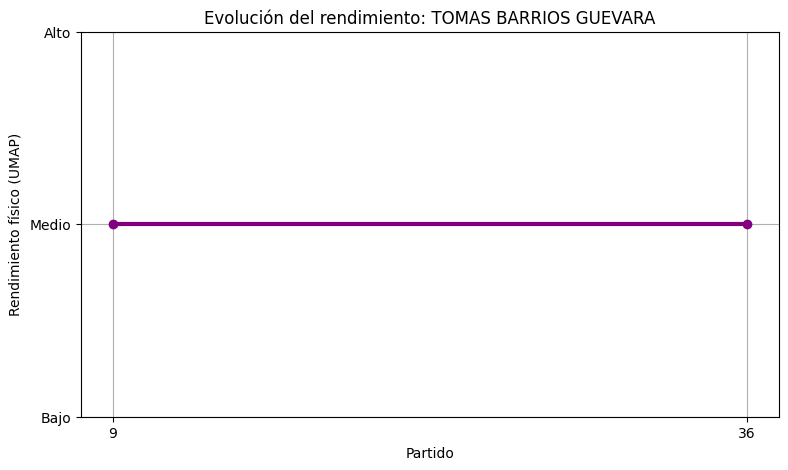

In [134]:
graficar_evolucion("TOMAS BARRIOS GUEVARA")


In [136]:
resumen = matches_ordenado.groupby("player_name_clean").agg(
    primero=("nivel_num", "first"),
    ultimo=("nivel_num", "last"),
    max_rend=("nivel_num", "max"),
    min_rend=("nivel_num", "min"),
    partidos=("nivel_num", "count")
)

resumen["cambio_total"] = resumen["ultimo"] - resumen["primero"]

resumen


,primero,ultimo,max_rend,min_rend,partidos,cambio_total
player_name_clean,,,,,,
ANDREA JULIETH SOSA RODRIGUEZ,1,2,2,0,3,1
CARLOS FELIPE ANDRADE SAENZ,1,0,1,0,3,-1
CESAR CAMILO DIAZ CUFINO,2,1,2,1,2,-1
CRISTIAN STEVAN SOTO ZAPATA,2,0,2,0,3,-2
DAVID SANTIAGO MEDINA BUITRAGO,0,0,1,0,3,0
DAVID SANTIAGO MURCIA BARRERA,1,1,2,1,3,0
FERMIN ALEJANDRO ESCALONA GUILLEN,2,2,2,2,1,0
ISABELLA BUITRAGO HURTADO,0,1,1,0,3,1
JAIME ANDRES CASTILLO ALVAREZ,1,2,2,1,2,1
